# Encoding and Decoding when Split Size is Unknown

##About
---
Let's imagine that the coding principle is known, but `Split Size` is not. Therefore, we have the task of find this parameter.

Recall that during encoding, we cut off the end of the text that was smaller than the split size (`Split Size`). To avoid this problem and confuse everyone, I propose adding random letters to the nearest prime number.
___
Уявимо, що принцип кодування відомий, але `Split Size` - ні. Тому в нас є задача підбору цього параметру.

Згадаємо, що під час кодування ми обрізали кінцівку тексту, який був меньше за кратність розділення (`Split Size`). Щоб уникнути цю проблему і всіх заплутати, пропоную доповнити текст випадковими літерами до найближчого простого числа.



---
---
## Import & mount

In [1]:
import os
import re
import copy
import math
import random
import string
import numpy as np
import pandas as pd

from sympy import nextprime

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import plotly.graph_objects as go

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# from mpl_toolkits.mplot3d import Axes3D

# plt.rcParams['figure.figsize'] = [15, 6]

In [ ]:
# Mount GitHub
!git clone https://github.com/EdwardGerman/Columnar-Transposition-Cipher.git  # clone repository
%ls  # checking whether all files are present
drch = '/content/Columnar-Transposition-Cipher' # Path to data

folder_pp = 'Data_pp'
folder_ppt = 'Data_test_pp'
folder_pt = 'Parity_tables'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
split_size = 24 #13
folder = folder_ppt
text_file = 'Robert_Burns_pp.txt'

# 'Computer_articles_pp.txt',
# 'Chat_comments_pp.txt',
# 'Jane_Eyre_pp.txt',
# 'Disturbed_Immortalized_pp.txt',
# 'Advanced_Literature_pp.txt',
# ,
# 'News_articles_pp.txt'

# 'All_texts_test_pp.txt'
# 'Chat_Comments_pp.txt' #All texts_pp

---
---
## Funcfions

In [ ]:
def display_df(df, name = True):
    pd.set_option('display.max_columns', None) # Print all rows (features) in DF
    if name == True and hasattr(df, 'name'): print(df.name + ':')
    display(df)
    print('\n')
    pd.reset_option('display.max_columns')     # Default setting: print print only first & final 5 rows


---
---
---
**`Encoding`** is the task of converting an initial text into a coded text. According to the task, the  initial text is written in a single line with only letters (all other characters, including spaces, are absent). Then the text is splitted into equal pieces of a certain size and written to a 'matrix'. After that, the columns of the matrix are shuffled. Next, the original single line structure of the text is restored.
___
>**`Encoding`** - це задача перетворення початкового тексту в кодований. За умовою задачі, початковий текст записується в одит рядок тільки літерами (всі інші симіоли включно з пробілами відсутні). Потім текст розбивається на однакові шматки візначеного розміру і записується в 'матрицю'. Після чього стовпці матриці перемішуються. Далі відновлюється початкова структура тексту в один рядок.
___
Encoding procedure is following:
0. Read file for encoding and remove 'spaces' (after this step we have a text variable with one string)
1. Text *spliting* (`SplitText()` function)
2. Making *dict*, that contain *columns* of spliting text (`ColDict()` function)
3. *Shuffeling* of the columns - shuffling elements of the dict (`ShuffleDict()` function)
4. Reconctruction text stucture from the shuffled dictionary (`ShuffleDict_to_Text()` function)

!Note
> We combined the last 4 steps (functions) to one function, which doing *encoding procedure* - `EncodingText()`


##### Step 0.

Read 'All texts' file:

In [ ]:
# Read:
path_r = os.path.join(drch, folder, text_file)#All texts_pp
with open(path_r, 'r', errors='ignore') as file:
    text = file.read()

In [ ]:
# text = text[:300]
text_letters = text.replace(' ', '')
print('Len of preproc. text: ', len(text), '\nLen of text bli space: ',len(text_letters), sep='')

Len of preproc. text: 11468
Len of text bli space: 9196


Generation of enlarged text

In [ ]:
def generate_random_string(n):
    letters = string.ascii_lowercase  # get all lowercase letters
    return ''.join(random.choice(letters) for _ in range(n))

def EnlargedTextGeneration(txt, split_size):
    len_text = len(txt)
    new_len = len_text + (split_size - len_text%split_size) # n + (q - n%q)
    new_len = nextprime(new_len)

    return txt + generate_random_string(new_len - len_text)

enlarged_text = EnlargedTextGeneration(text_letters, split_size)
print('Len of enlarged text: ',len(enlarged_text))

Len of enlarged text:  9221


##### Steps 1-4

**Step 1**: Function for `split` of a text on defined parts number


In [ ]:
# Function for split of a text on defined parts number
def SplitText(text, n):
    return re.findall('.{' + str(n) + '}', text)

**Step 2**: Create dict with columns of a given text


In [ ]:
# Create dict with columns of a given text
def ColDict(split_list):
    n = len(split_list[0])
    col_dict = {}
    for n in range(n):
        col_dict[n+1] = ''.join([row[n] for row in split_list])

    return col_dict

**Step 3**: Function that shuffle elements of dict ('columns').


In [ ]:
def ShuffleDict(col_dict, p = False):
    key_list = list(col_dict)   # Initial key list (will be changed)
    old_list = key_list.copy()  # Copy of initial key list (for save)

    random.shuffle(key_list)    # Shuffle key list

    upd_col_dict = dict(zip(key_list, col_dict.values()))   # Change keys
    sorted_col_dict = dict(sorted(upd_col_dict.items()))    # Sorted dict by new keys

    # ---
    sorted_list = [x for _, x in sorted(zip(key_list, old_list))] # for print

    if p == True:
        print('Keys of the dict:      ', old_list)
        print('New (shuffle) position:', key_list)
        print('Sorted new keys:       ', sorted_list)

        print('Old dict:'), display(col_dict)
        print('Shuffled dict:'), display(upd_col_dict)
        print('Sorted shuffled dict:'), display(sorted_col_dict)

    return sorted_col_dict, [old_list, key_list, sorted_list]

Step 4: Function what transform dict with shuffled columns to text (char value). This function is inverse to `ColDict()` function.


In [ ]:
def Dict_to_Text(col_dict):
    text_from_dict = ''
    values_list_of_col_dict = list(col_dict.values())

    for n in range(len(col_dict[1])):
        s = ''.join([col[n] for col in values_list_of_col_dict])
        text_from_dict = text_from_dict + s # + '\n'

    return text_from_dict

##### Combined function: unites steps 1-4

In [ ]:
def EncodingText(text, n, p = False):
    split_text = SplitText(text, n)     # Separate of text on lines of n characters each
    col_dict = ColDict(split_text)
    shuf_dict, lists = ShuffleDict(col_dict, p)
    encoded_text = Dict_to_Text(shuf_dict)
    return encoded_text, lists

In [ ]:
encoded_text, lists = EncodingText(enlarged_text, split_size)
old_pos, new_pos, sorted_pos = lists

print('Old position: ', old_pos, '\nNew position: ', new_pos,'\nSorted pos. : ', sorted_pos, sep='')
print(len(text_letters),len(enlarged_text),len(encoded_text))
encoded_text

Old position: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
New position: [17, 18, 20, 19, 2, 10, 9, 21, 8, 12, 7, 5, 16, 22, 24, 11, 1, 15, 6, 3, 13, 14, 4, 23]
Sorted pos. : [17, 5, 20, 23, 12, 19, 11, 9, 7, 6, 16, 10, 21, 22, 18, 13, 1, 2, 4, 3, 8, 14, 24, 15]
9196 9221 9216


'altieshfsdnthelbroanoenneoapkeentlhyreretabronrtryeonpeguopmryoaoprennuduseeakdaesbnnytmngalsatnentbanhslavtheitheordleieserrrayhthcefgrnnlaeyattmraeehnmaatslhieteharifadtaceelewphbrrardnaeniseemthacttyhoanmedmnoorotlelkmcguyreninleprpoonihehandswgnanohuagntehdudiattyhetaawsnheneerromrceensnrerwliyaeevaajaelnatrimbowsaaebsanarsbnolauststhdsnenedaesagtfrosueideouecbhiwnendasllivttcamttcfniuebatheaittahaehsnoretenmhtaithgharsmeeylreitrtimhtiaonaashniedhmaaenihhnmwewsacleyrdaedparlirddaeisnilnochresseewyhadtneafyaeritstehdhwesiaaoefbyfsentjramnaemkiifoiitraarhfarnethsienvartbchotaawinladealromlkagwhittgadaunefhhbyergrrohhamnreataedwaeteitfwiacalaerhbdiaeosbdantehreehiihaftdessaeanronohnprtmeniomaatodhwrdlaowomrntthrnotoslwdglabtrheofiaaurhangtanceenmaaerdfiattheniosreoanhmdepiheancnhtunaesbabhtoochrterikeolfnmwtossanaaeeednorassssyhltllspoylsmeaeeaeufctsemfisnnotefaifiasouarcahwkddehntiteclthaeoudlapwivleahhtesaisreeaaloestwlmtetwntaeheuifiaamnafdhbwdtteenhansieseteyidshaelshmaemhotieero

---
---
---
## Decoding


#### Load Parity Table

In [ ]:
# Load DataFrame (Parity Table) with pair coeficientes (`Log BQuant without spaces.csv`)
df_file = 'Log BQuant without spaces.csv'

path_pt = os.path.join(drch, folder_pt, df_file)
parity_table = pd.read_csv(path_pt)
parity_table.name = 'Logarithmic Parity Table'

# Rename indexes and columns (from '-a' & 'b-' to 'a' & 'b')
all_letters = [chr(i) for i in range(ord('a'), ord('z') + 1)]
parity_table.index = all_letters
parity_table.columns = all_letters

# display_df(parity_table)

#### Functions

##### For `Parity Factor Table`

In [ ]:
# Parity factor function
def ParityFactor(df, col_dict, col_pair):
    column_size = len(col_dict[list(col_dict.keys())[0]])
    first_column =  col_dict[col_pair[0]]
    second_column = col_dict[col_pair[1]]

    return sum([df[second_column[k]][first_column[k]] for k in range(column_size)])

In [ ]:
# Parity Factor Table (PFT) function
def ParityFactorTable(encod_col_dict):
    split_size = len(encod_col_dict)

    PFT = pd.DataFrame(0, index=range(1,split_size+1), columns=range(1,split_size+1))

    PFT = PFT.rename_axis('First column')
    PFT = PFT.rename_axis('Second column', axis='columns')

    for p in range(1, split_size+1):
        list_other = list(range(1,split_size+1))
        list_other.remove(p)

        for q in list_other:
            PFT.at[p,q] = ParityFactor(parity_table, encod_col_dict, (p,q))
    return PFT

##### For `visualization`

In [ ]:
def PFT_Heatmap(PFT, figsize=(20, 15), cmap='coolwarm', font_size = 8, fmt='.2f'):

    sns.set()
    plt.figure(figsize=figsize)

    ax = sns.heatmap(PFT, annot=True, fmt=fmt, cmap=cmap,  cbar=False,#
                        annot_kws={'size': font_size}) # YlGnBu viridis
                        # fmt: # 'd' # '.2f' # '.0f' # '.2g'

    ax.xaxis.tick_top()     # axis ticks on top
    plt.yticks(rotation=0)  # rotate of axis ticks

    font_t = {'family': 'serif', 'color':  'darkred', 'weight': 'bold', 'size': 18,}
    font_l = {'family': 'serif', 'weight': 'bold', 'size': 10,}

    # Title, xlabel, ylabel:
    plt.text(0.5, 1.13, 'Parity Factor Table', ha='center', transform=ax.transAxes, fontdict=font_t)
    plt.text(0.5, 1.08, 'Second (right) column in pair', ha='center', transform=ax.transAxes, fontdict=font_l)
    plt.ylabel('First (left) column in pair', fontdict=font_l)
    plt.show() # Show heatmap

In [ ]:
def PFT_3D(df, type3d = 'hist', figsize=(16,12), lower=None, elev=20, azim=30):

    title_name = 'Parity Factor Table'
    font_t = {'family': 'serif', 'color':  'darkred', 'weight': 'bold', 'size': 24,}

    x = df.index.tolist()
    y = df.columns.tolist()
    X, Y = np.meshgrid(x, y)        # Set meshgrid

    if lower is not None:
        df = df.replace(0, df[df != 0].stack().min()*lower)


    if type3d == 'hist':
        colormap=cm.viridis;# elev=20; azim=30;
        Z = df.values

        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection='3d')  # Making 3D axes
        colors = colormap(Z.flatten() / Z.max())    # Set different bar colors depend on bar height

        X = X.flatten()
        Y = Y.flatten()
        dx = dy = 0.8
        dz = Z.flatten()

        ax.bar3d(X, Y, np.zeros_like(dz), dx, dy, dz, shade=True, color=colors)# Build 3D hist

        ax.view_init(elev=elev, azim=azim)          # Tune of the graph rotate
        ax.set_title(title_name, fontdict=font_t)
        ax.set_xticks(x);   ax.set_xticklabels(x)
        ax.set_yticks(y);   ax.set_yticklabels(y)

        plt.show()

    if type3d == 'mpl':
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection='3d')

        ax.plot_surface(X, Y, df.values)
        ax.set_title(title_name, fontdict=font_t)
        ax.view_init(elev=elev, azim=azim)

        plt.show()

    if type3d == 'plotly':
        z = df.values
        fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
        fig.update_layout(title=title_name,
                          title_font=dict(family='Arial', size=24, color='darkred'),
                          autosize=False, width=1000, height=1000,
                          margin=dict(l=65, r=50, b=65, t=90))
        fig.show()

##### For `determine the number of clusters`

In [ ]:
# Elbow Method
def ElbowMethod(data, min_clusters = 1, max_clusters = 10):
    wcss = [] # List of the `Within-Cluster Sum of Squares` to centroid

    # Determining the optimal number of clusters using the Elbow Method
    for i in range(min_clusters, max_clusters+1):
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init=20) #, random_state=42
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    # Plotting graph
    # plt.figure(figsize=(12, 5))
    plt.plot(range(min_clusters, max_clusters + 1), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Within-Cluster Sum of Squares')
    # plt.show()

In [ ]:
# Silhouette method
def SilhouetteMethod(data, min_clusters = 2, max_clusters = 10):
    silhouette_scores = []

    for i in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10) # random_state=42
        kmeans.fit(data)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(data, labels))

    # plt.figure(figsize=(8, 6))
    plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette coefficient values')
    plt.title('Silhouette Method')
    plt.grid(True)
    # plt.show()


##### For `clustering`

In [ ]:
def GetNewLabels(labels):
    list_labels = labels.tolist()
    list_new_labels = []
    for l in range(len(set(list_labels))):
        n = list_labels.count(list_labels[0])
        list_new_labels = list_new_labels + [l] * n
        list_labels = list_labels[n:]

    return np.array(list_new_labels)

In [ ]:
def PlotsForClusters(data, labels, var_split_size):
    indices = np.arange(len(data))

    # Separation of data into clusters
    clustered_data = {i: [] for i in range(num_clusters)}
    for i, label in enumerate(labels):
        clustered_data[label].append(data[i])


    # Show data plots for each cluster
    plt.figure(figsize=(16, 6))
    for cluster, values in clustered_data.items():
        plt.scatter([indices[i] for i in range(len(data)) if labels[i] == cluster],
                    values, label=f'Cluster {cluster}')

    plt.plot(data, '-', c = 'darkblue', linewidth = 1)#

    plt.xlabel('Indexes in `sorted_pf_values`')
    plt.ylabel('Parity factor value')
    plt.title('Data plots for each cluster')
    plt.legend()

    unique_labels, counts = np.unique(labels, return_counts=True)
    info = f'Split size = {var_split_size}\n'
    info = info + f'Correct number of elements in Cluster 0: {var_split_size-1}\n'
    for label, count in zip(unique_labels, counts):
        info = info + f'Cluster  {label}:   {count}  elements\n'
    plt.text(0.5, 0.95, info, fontsize=12, ha='center', va='top', transform=plt.gca().transAxes)

    plt.show()

In [ ]:
def DetectionUncorrectSplitSize(CPL):  # CPL - column pairs list
    uniq_first_elts = len(np.unique([x for x, y in CPL]))
    uniq_second_elts = len(np.unique([y for x, y in CPL]))

    len_CPL = len(CPL)

    if uniq_first_elts < len_CPL:
        print(f'{len_CPL+1} - it`s uncorrect split size: several pairs with the same second element')
        return False

    if uniq_second_elts < len_CPL:
        print(f'{len_CPL+1} - it`s uncorrect split size: several pairs with the same first element')
        return False

    len_uniq_sorted_tuple_CPL = len(set([tuple(sorted(tpl)) for tpl in CPL]))

    if len_uniq_sorted_tuple_CPL < len_CPL:
        print(f'{len_CPL+1} - it`s uncorrect split size: pairs (a,b) and (b,a)')
        return False

    return True

##### For `Correct order` & `Text recovery`

In [ ]:
def CorrectOrder(column_pairs_list, p = False):
    first_column = {y for x, y in column_pairs_list} - {x for x, y in column_pairs_list}
    correct_order = [first_column.pop()]

    res = 0 # parameter of the end of loop
    while res is not None:
        res = next((i for i, tpl in enumerate(column_pairs_list) if tpl[1] == correct_order[0]), None)
        if res is not None:
            correct_order.insert(0, column_pairs_list[res][0])
            if p == True: print(res, column_pairs_list[res], correct_order)

    correct_order = correct_order[::-1]

    return correct_order

In [ ]:
def CorrectColDict(encod_col_dict, correct_order):
    decod_col_dict = {}
    for n, ncol in enumerate(correct_order):
        decod_col_dict[n+1] = encod_col_dict[ncol]
    return decod_col_dict

---
---
---
#### Decoding process




=== New split size - 5 =========================================================================


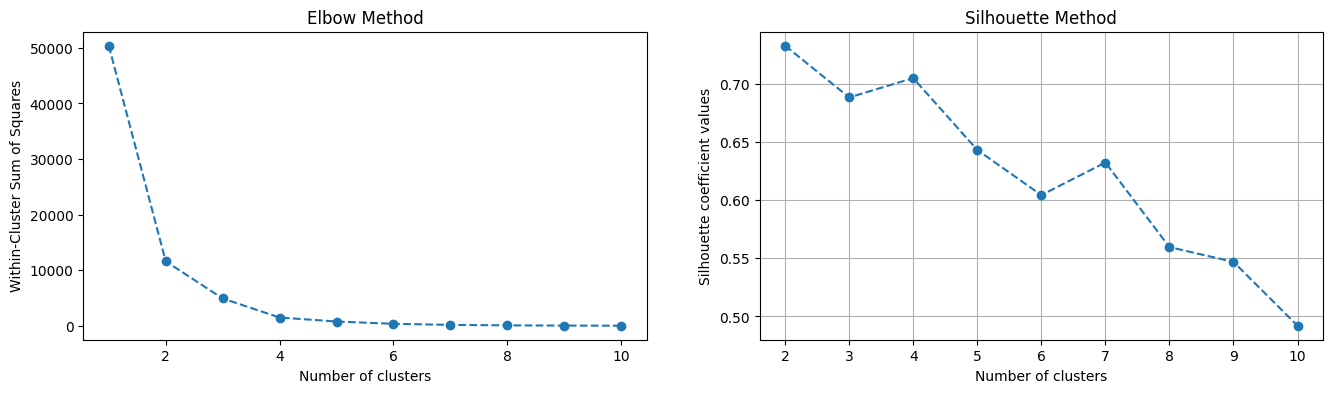

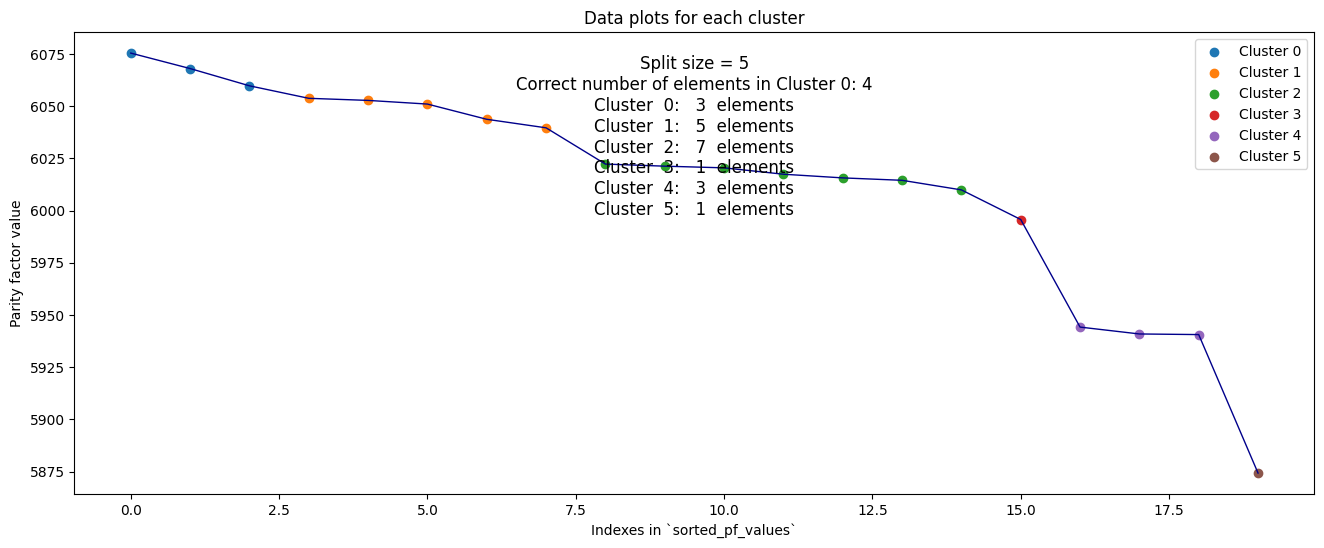

5 - it`s uncorrect split size: several pairs with the same first element



=== New split size - 6 =========================================================================


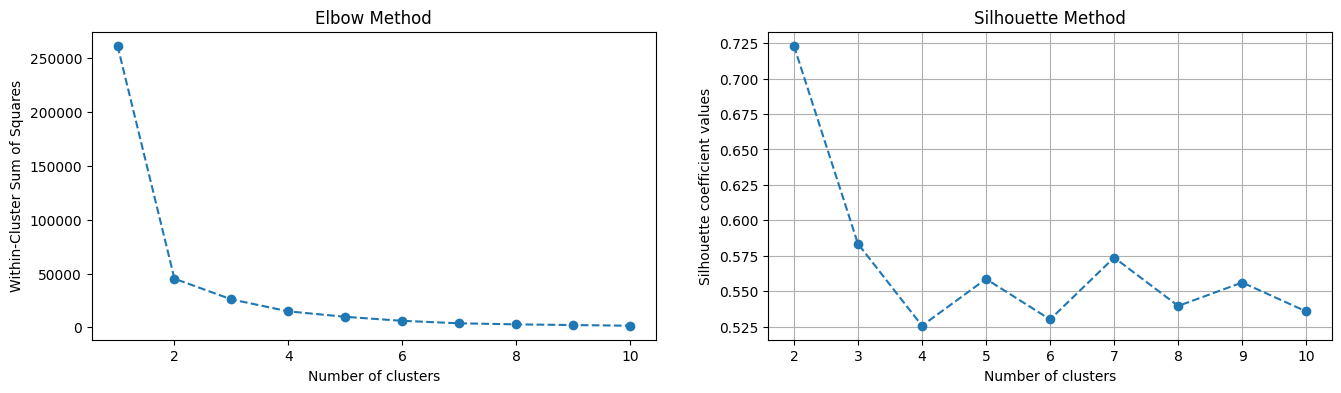

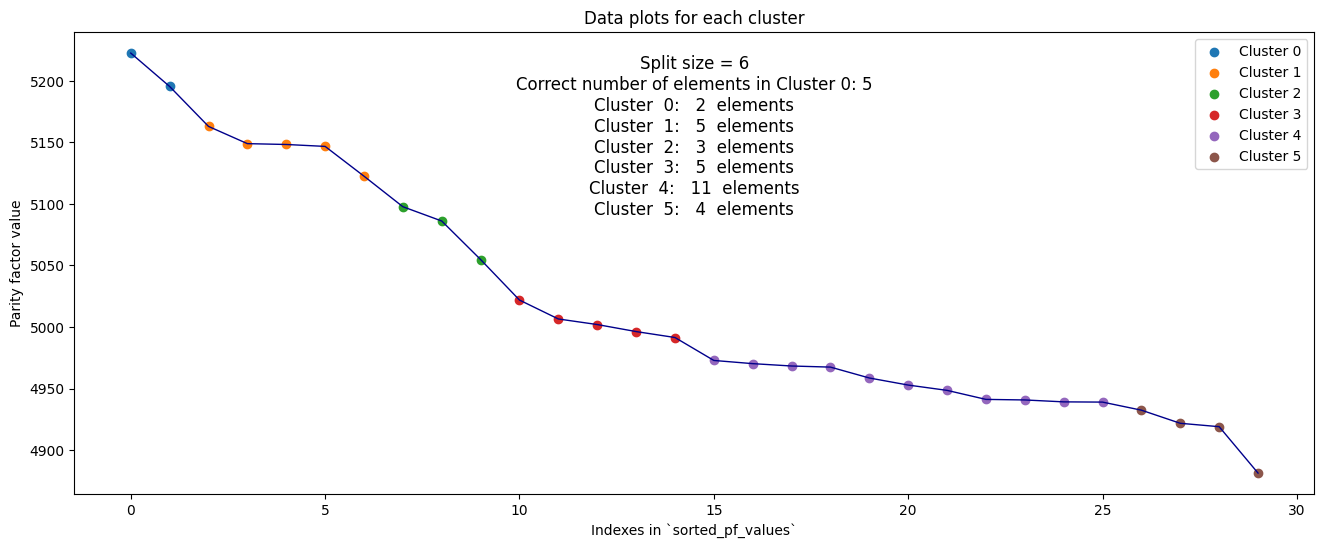

6 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 7 =========================================================================


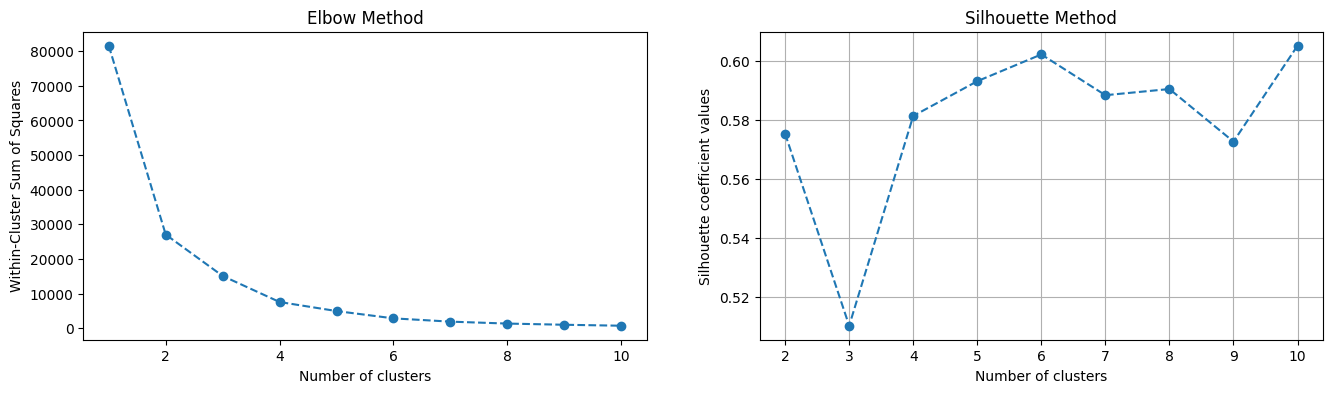

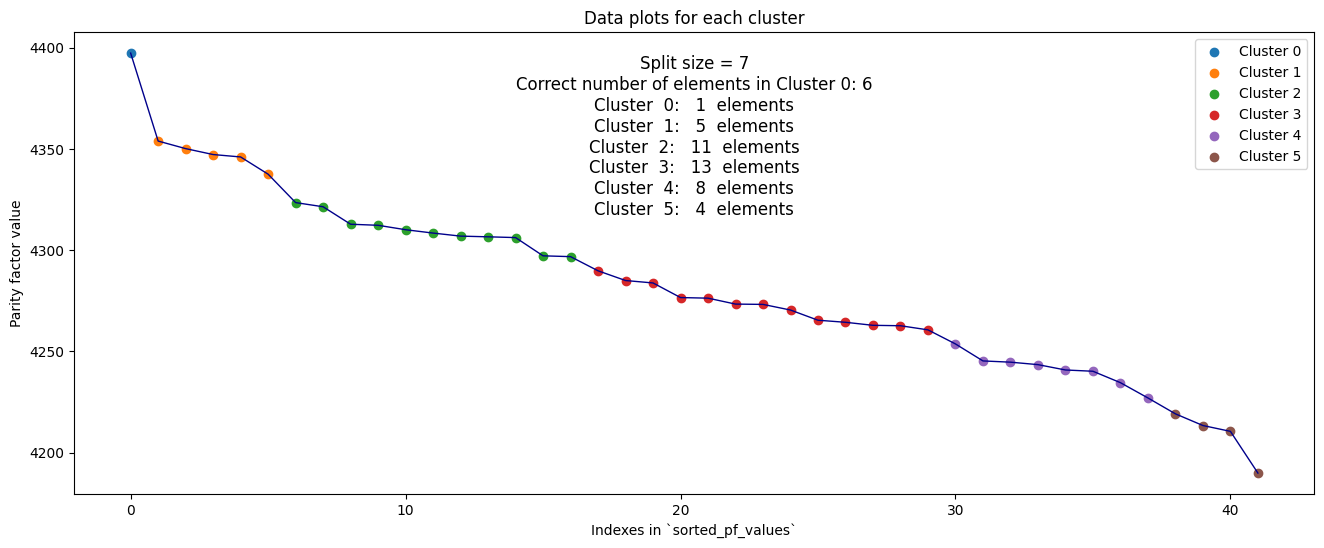

7 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 8 =========================================================================


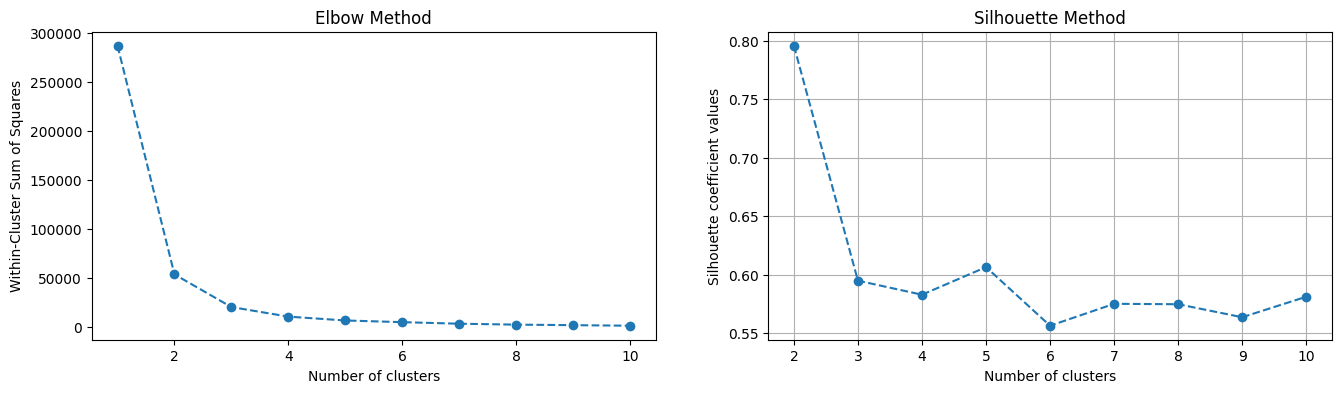

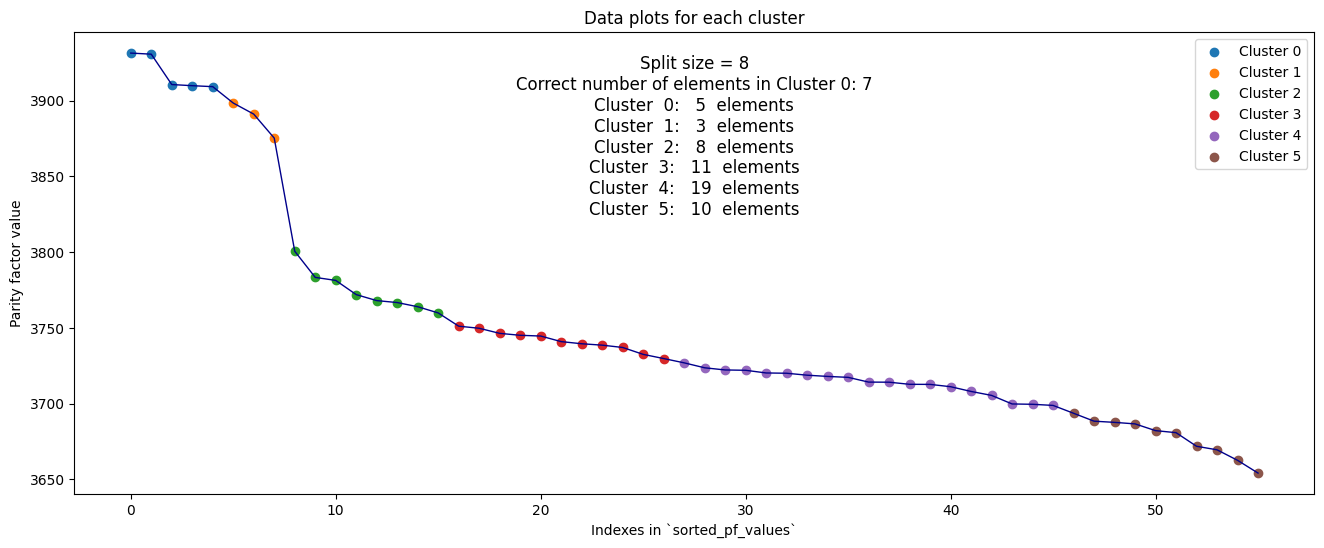

8 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 9 =========================================================================


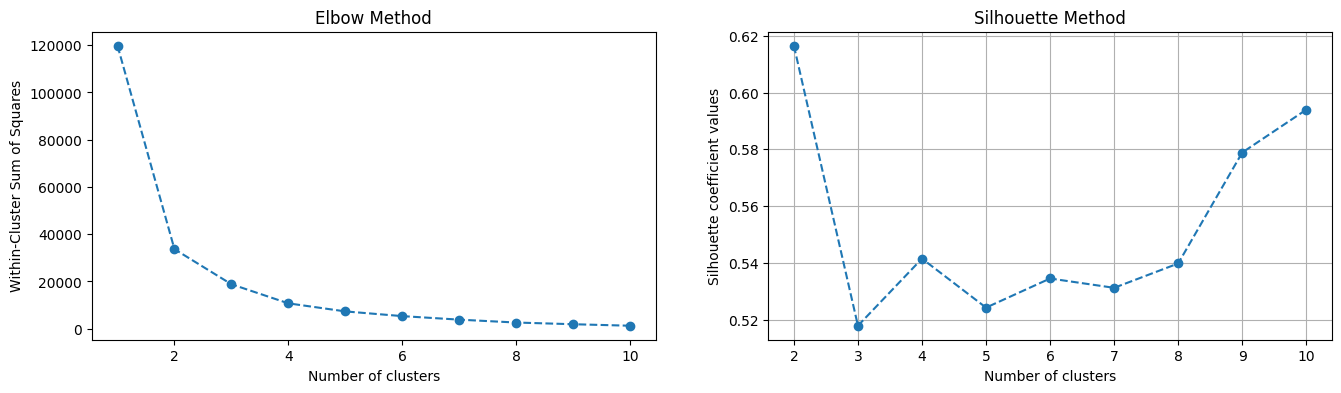

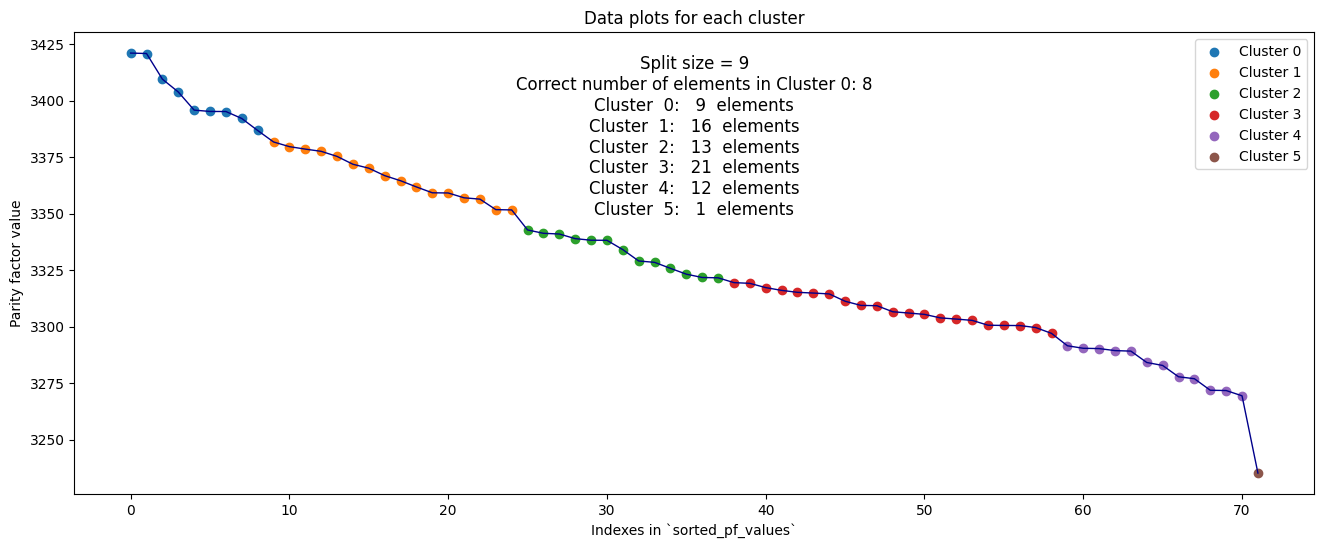

9 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 10 =========================================================================


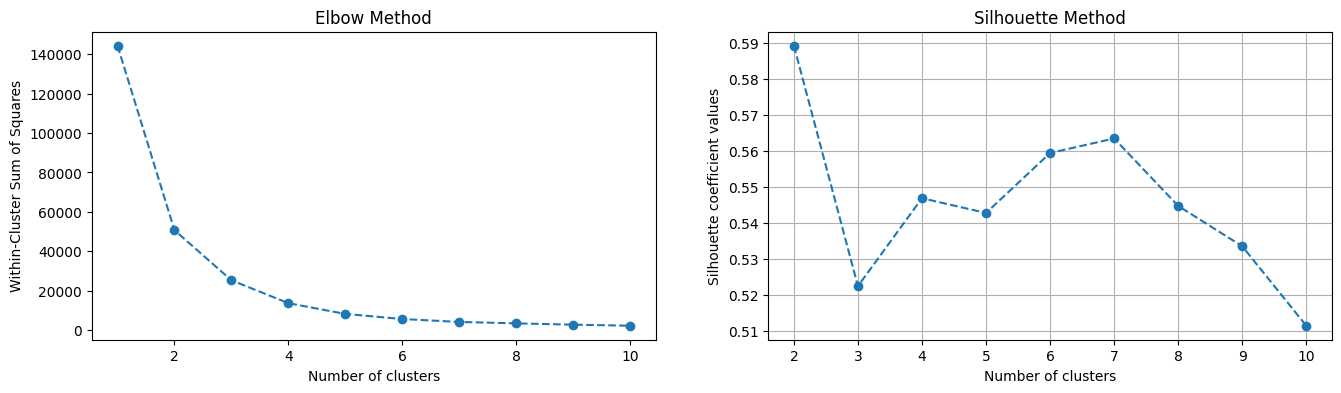

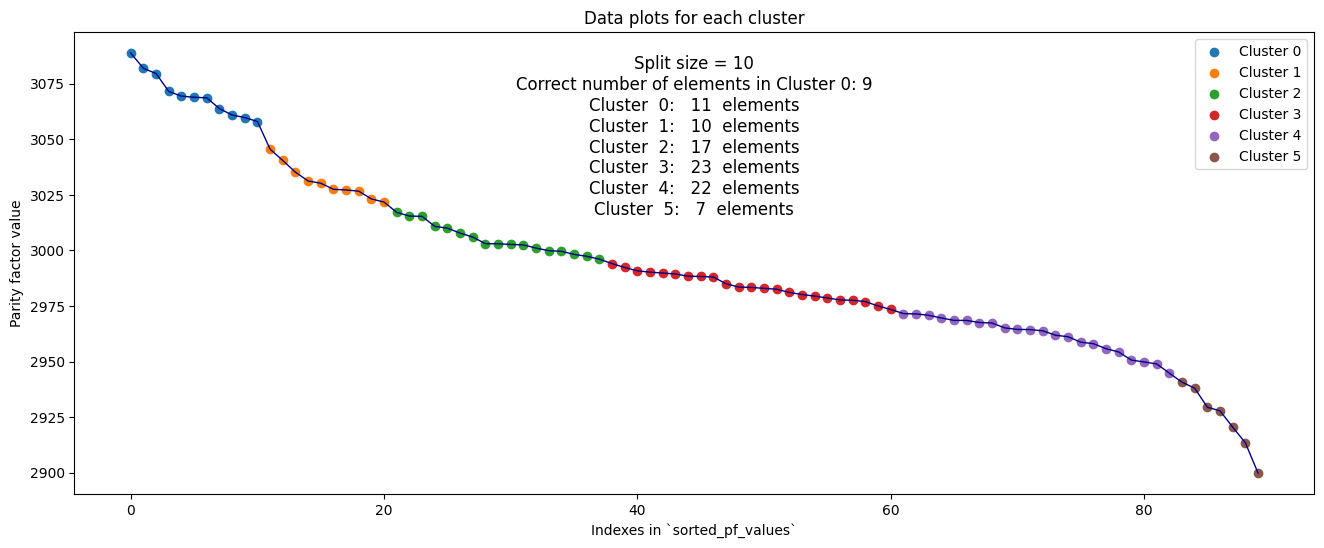

10 - it`s uncorrect split size: pairs (a,b) and (b,a)



=== New split size - 11 =========================================================================


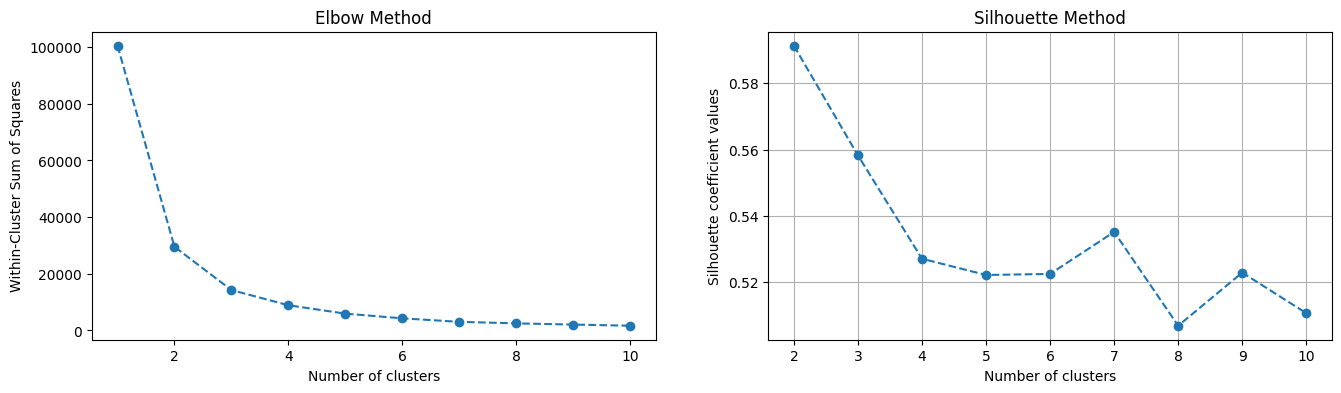

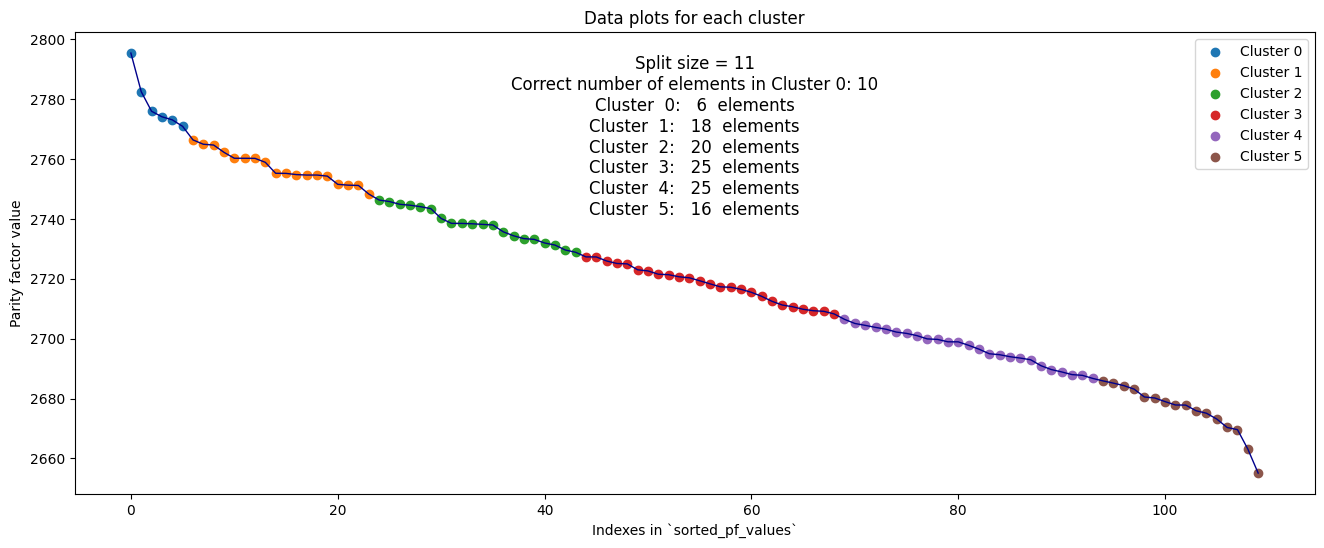

11 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 12 =========================================================================


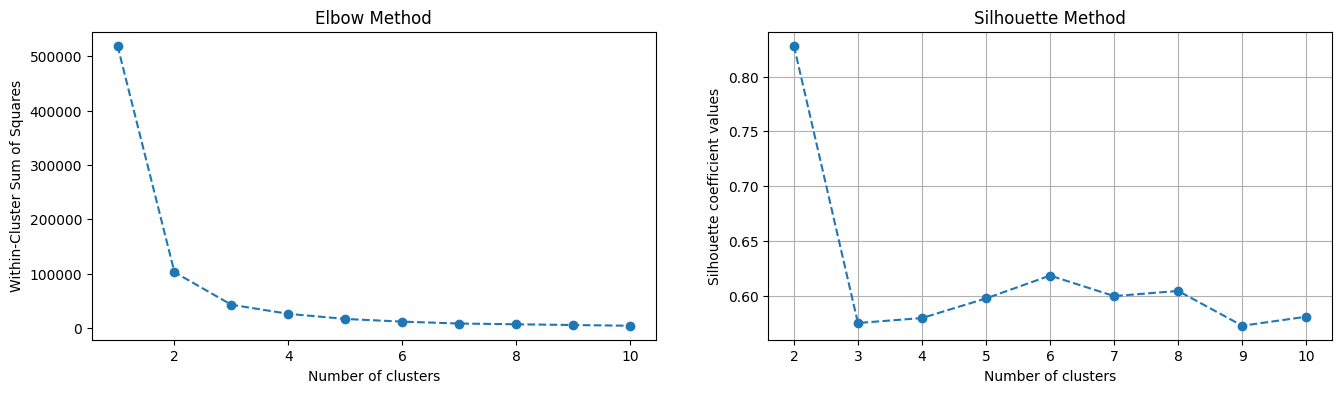

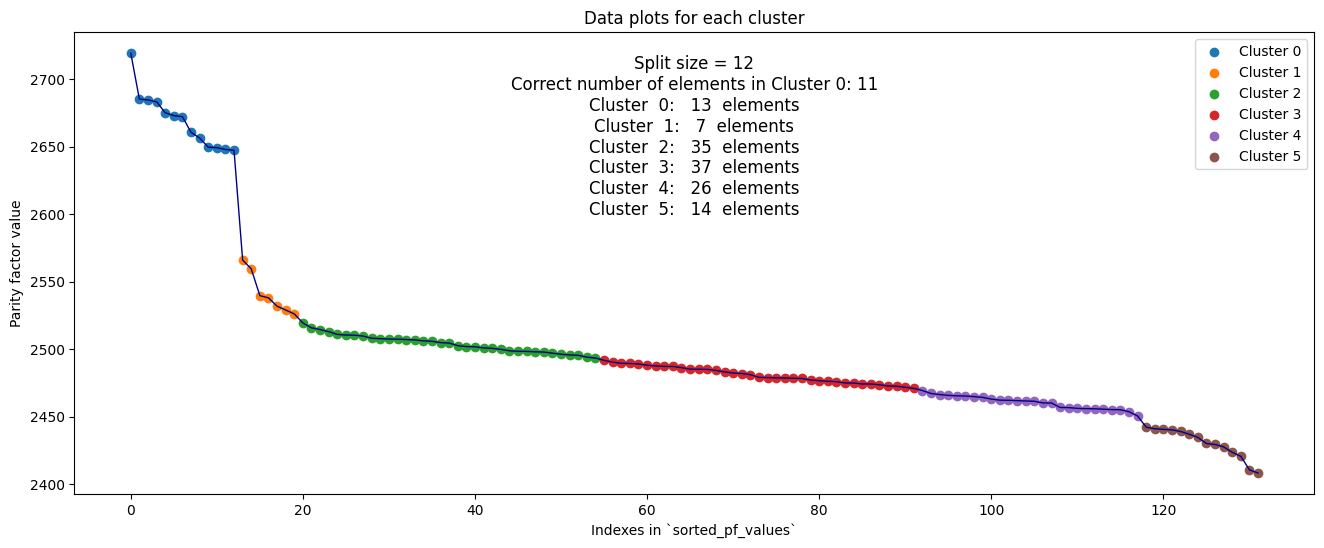

12 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 13 =========================================================================


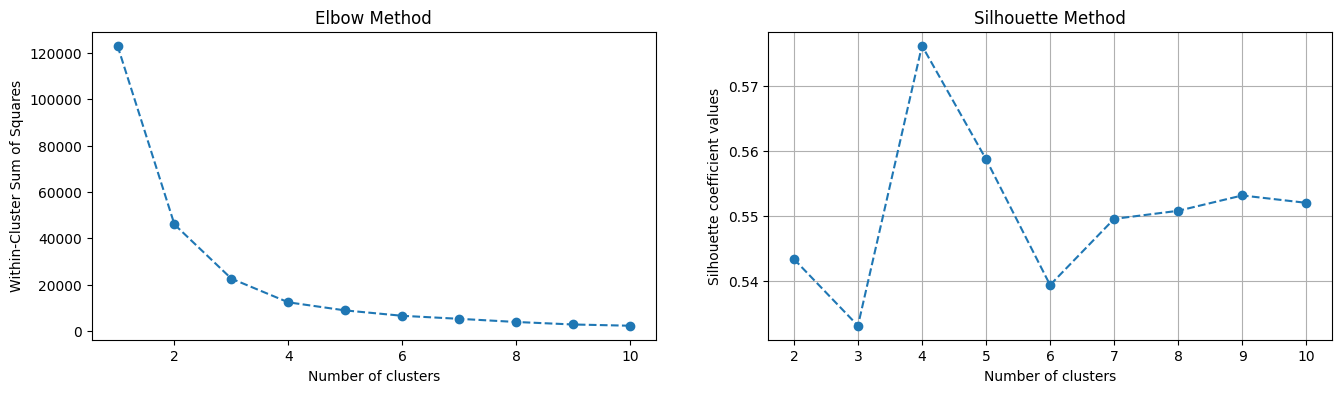

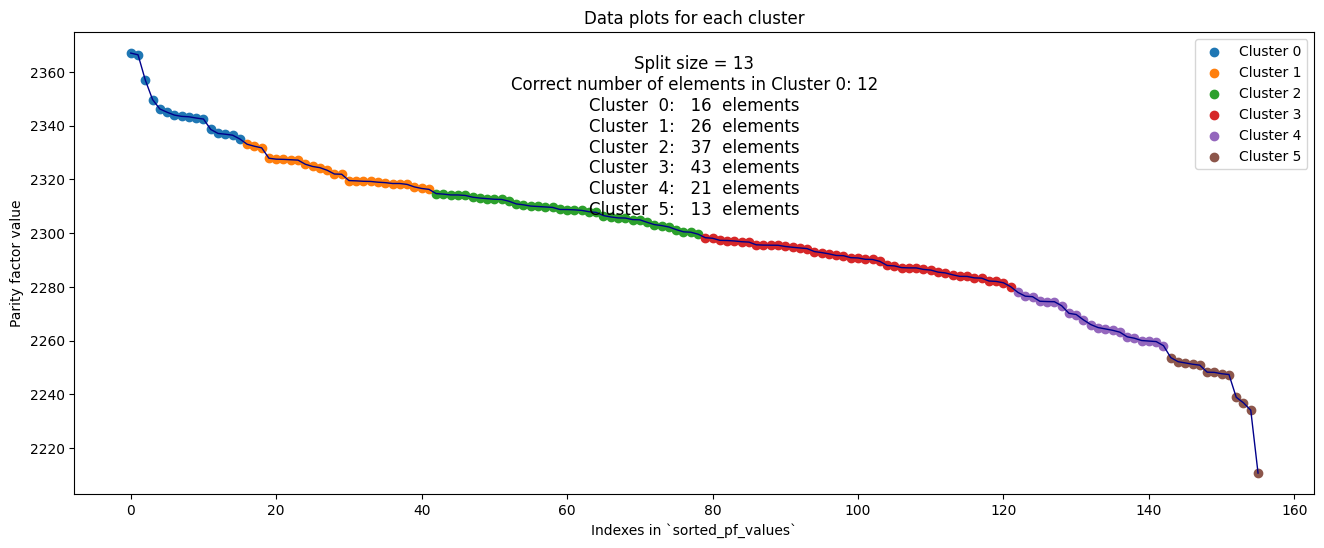

13 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 14 =========================================================================


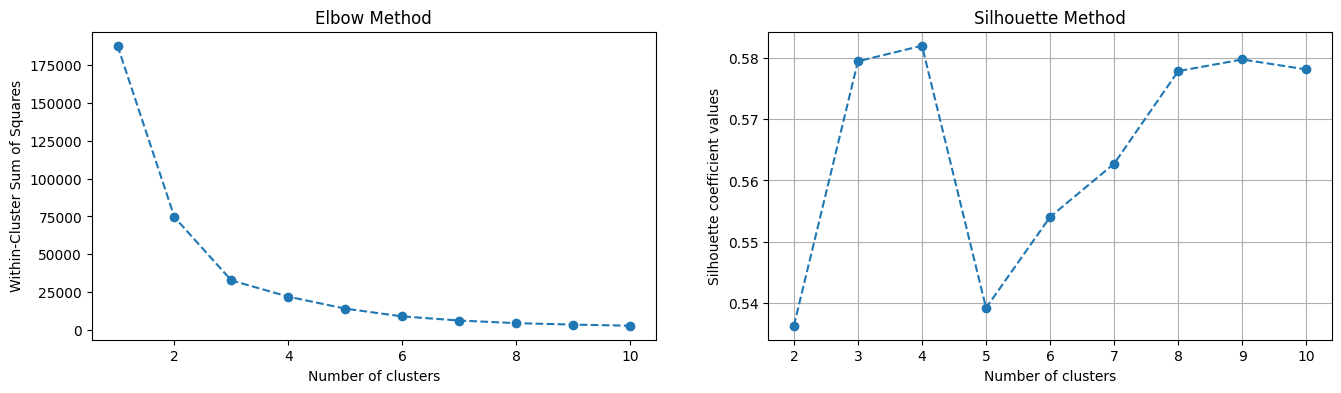

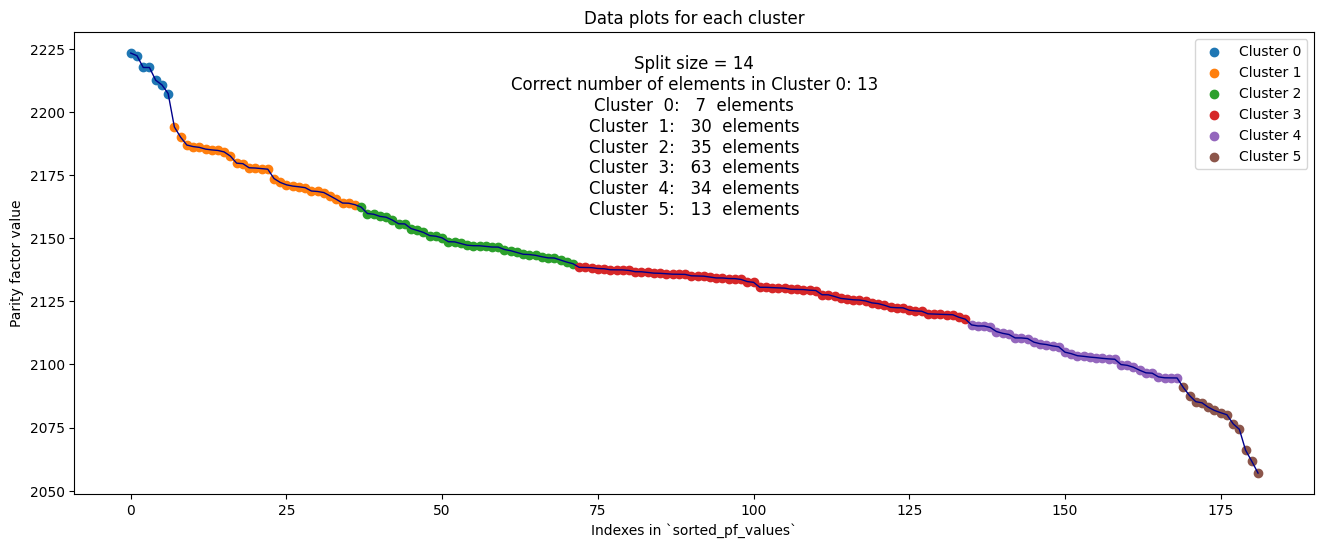

14 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 15 =========================================================================


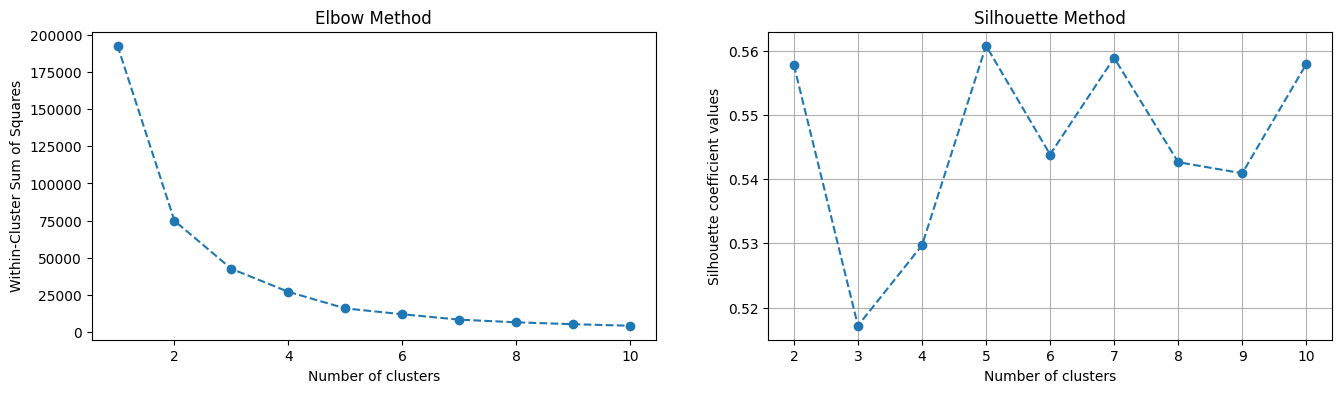

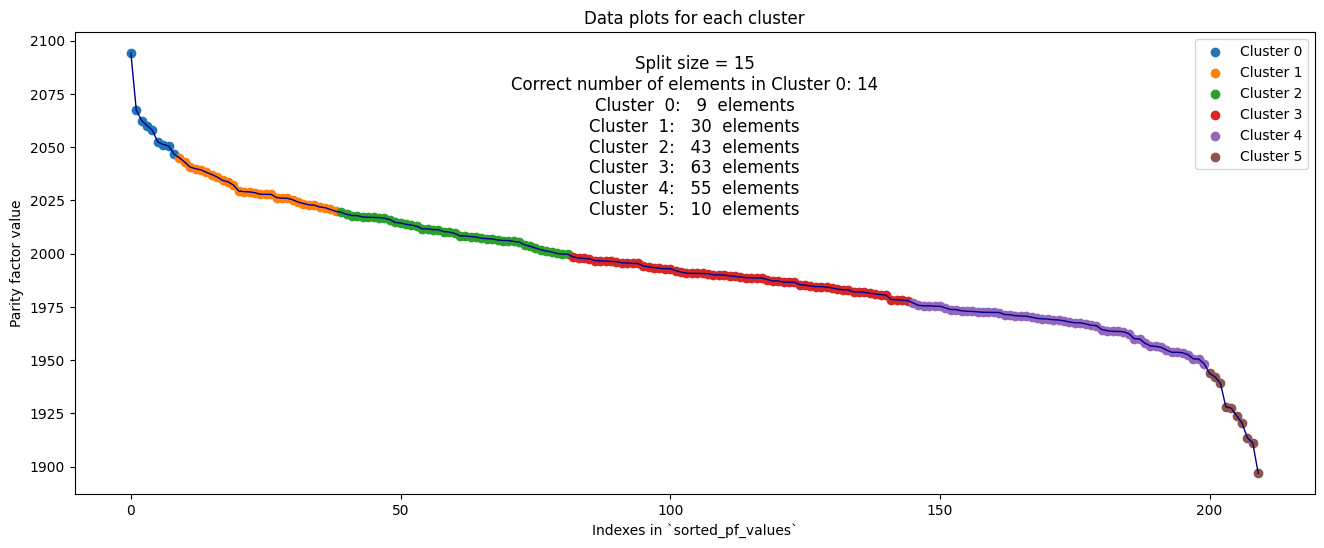

15 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 16 =========================================================================


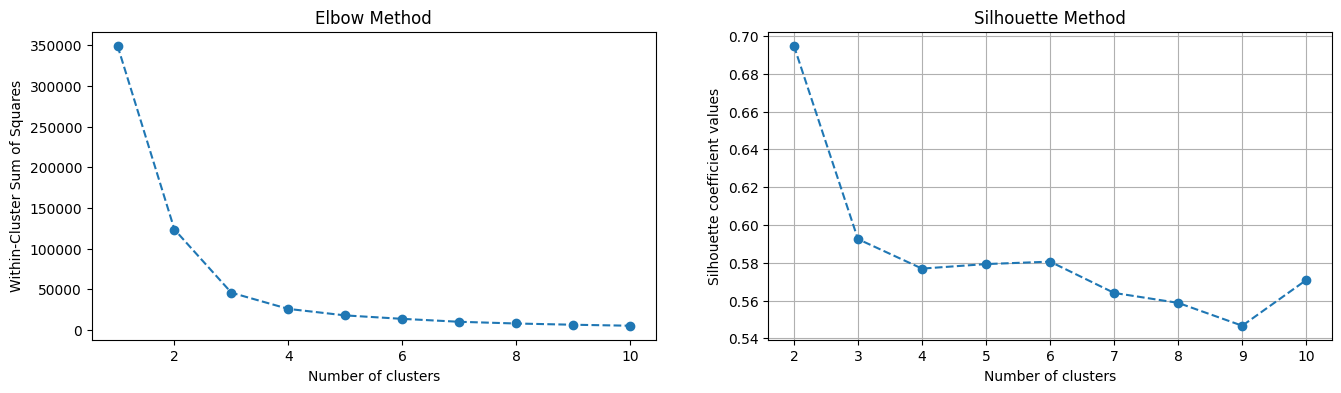

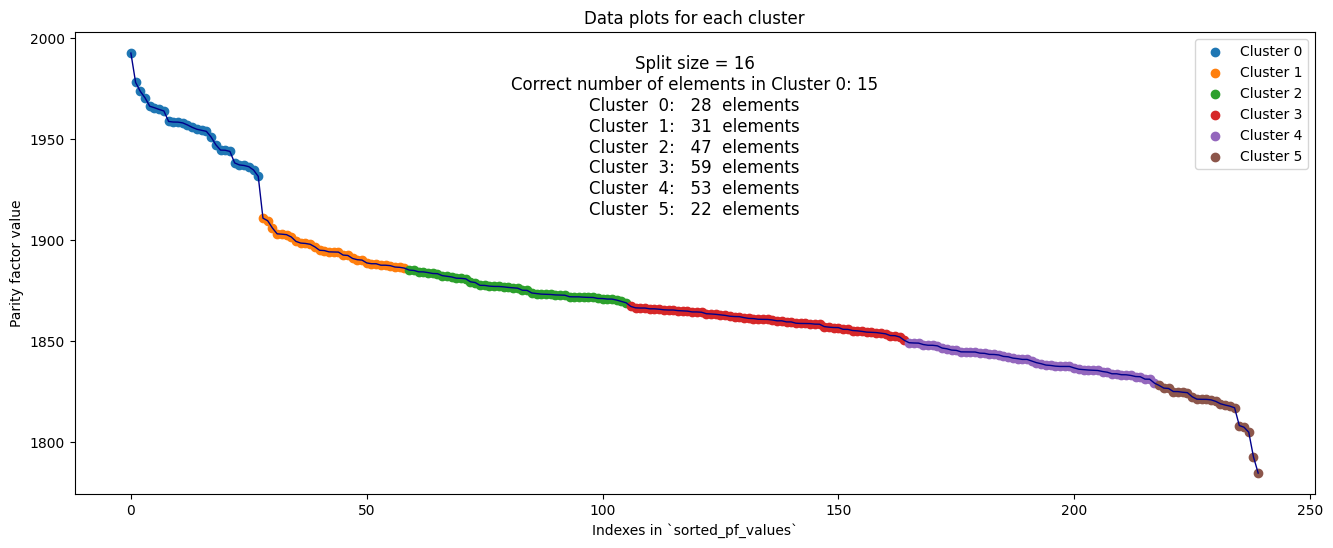

16 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 17 =========================================================================


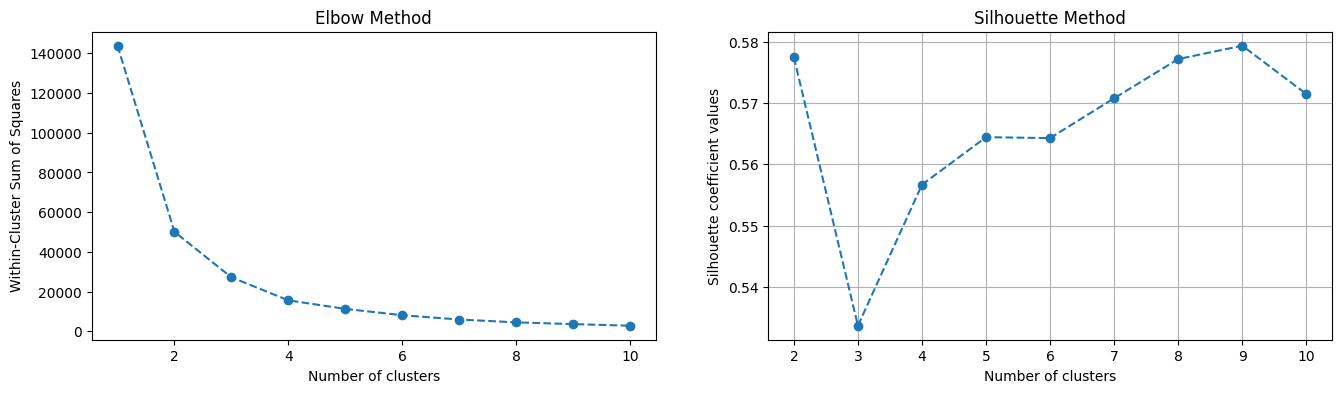

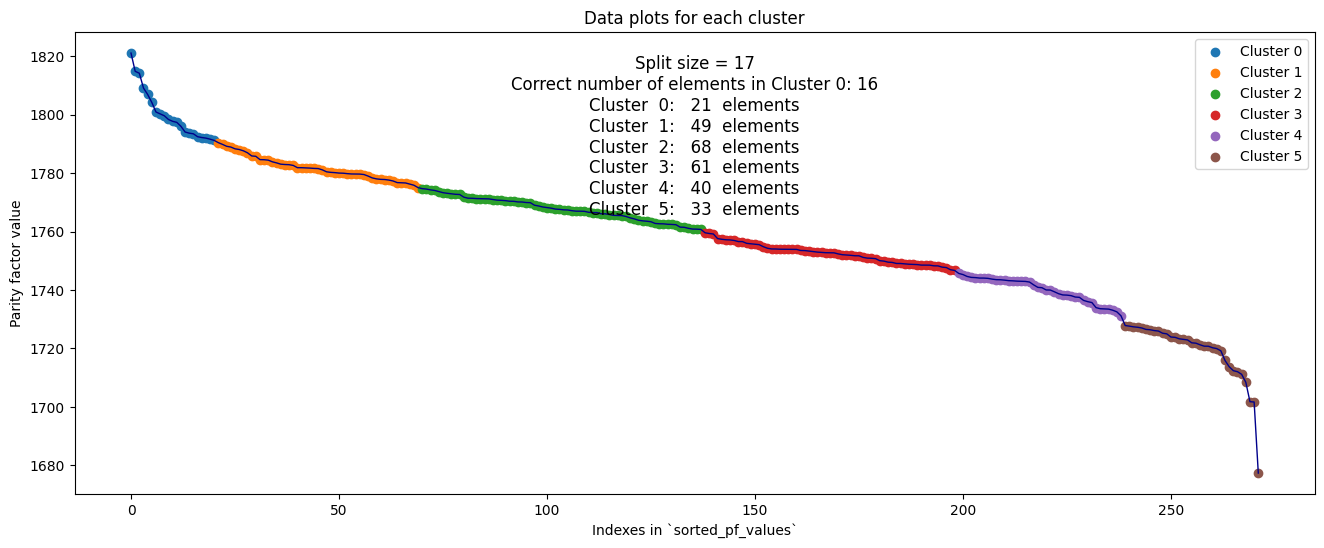

17 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 18 =========================================================================


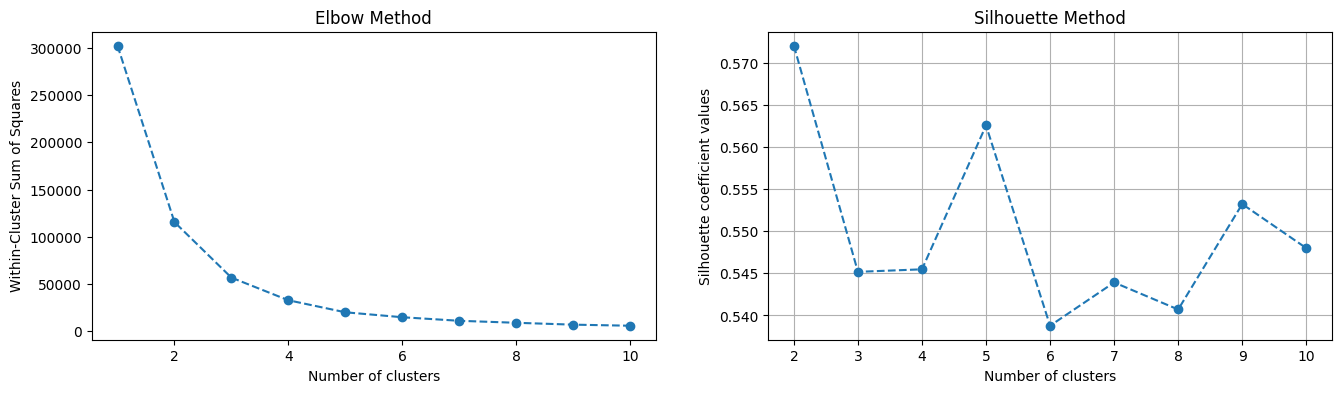

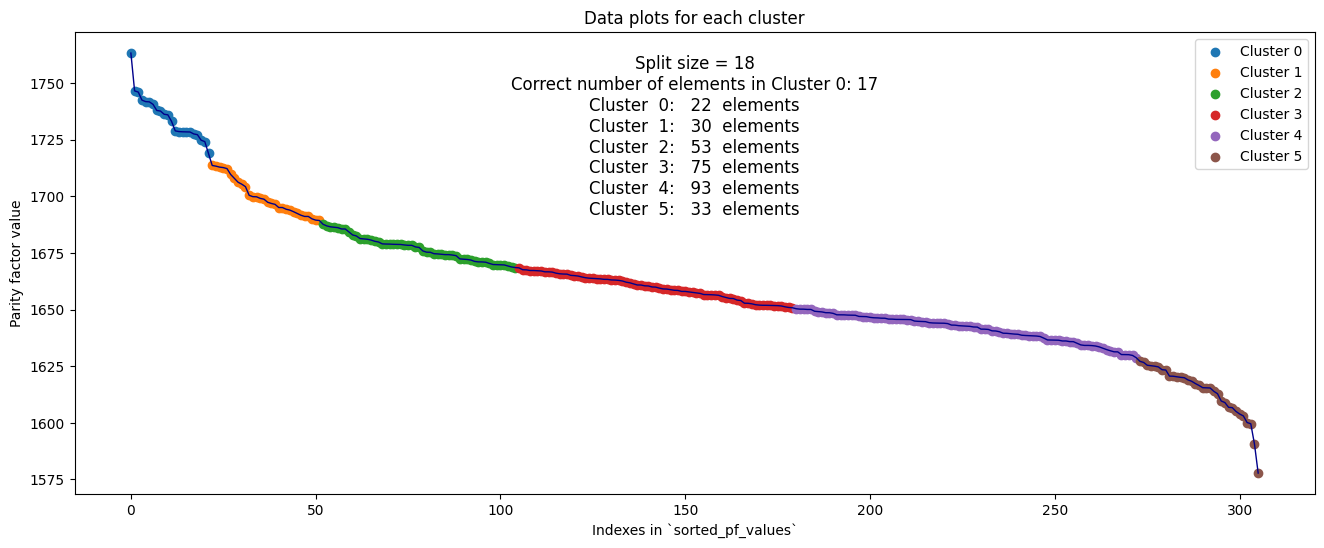

18 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 19 =========================================================================


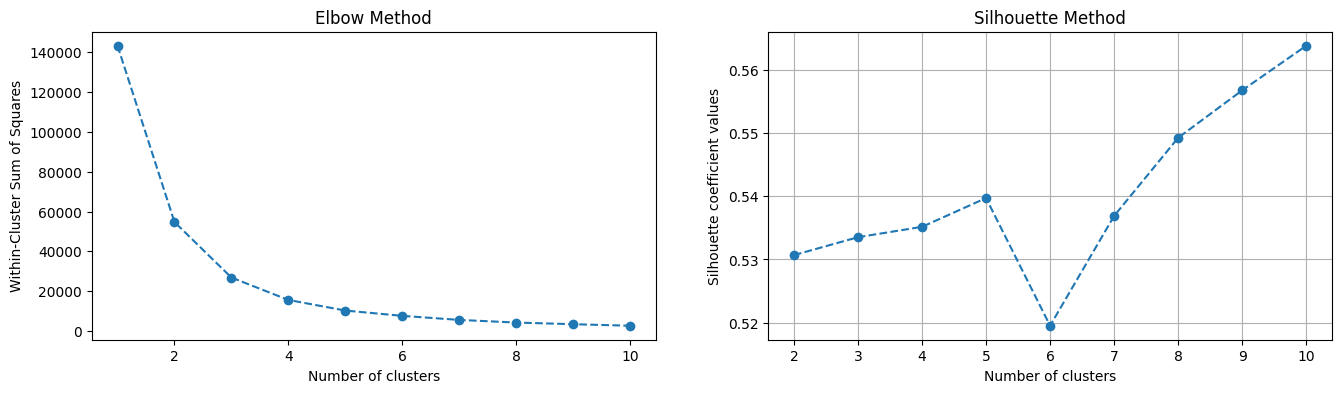

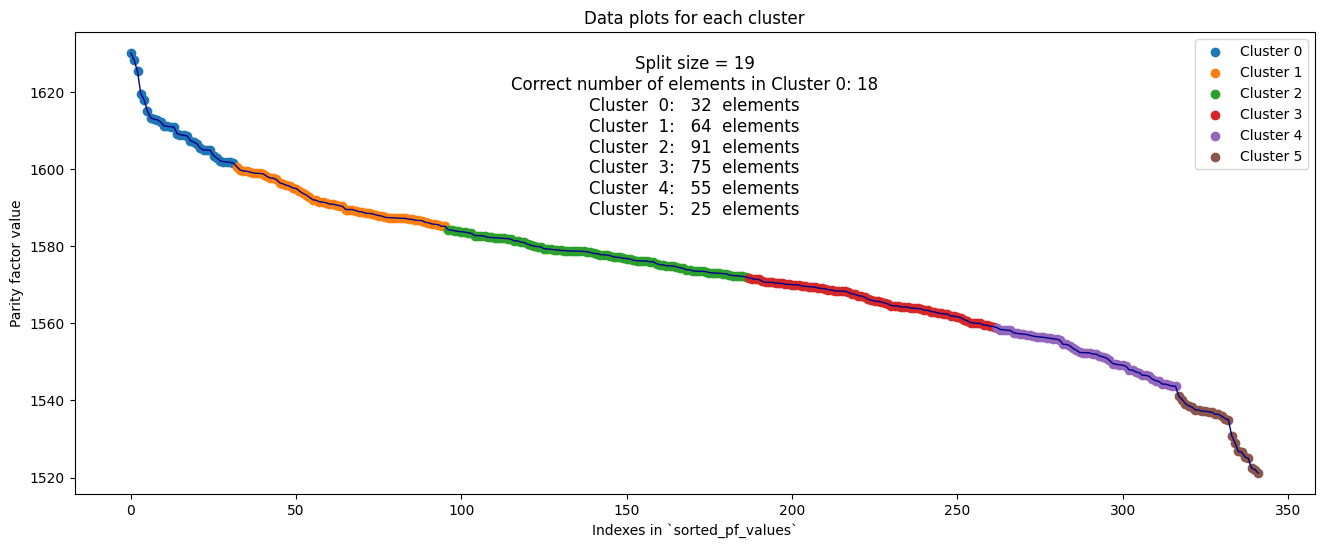

19 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 20 =========================================================================


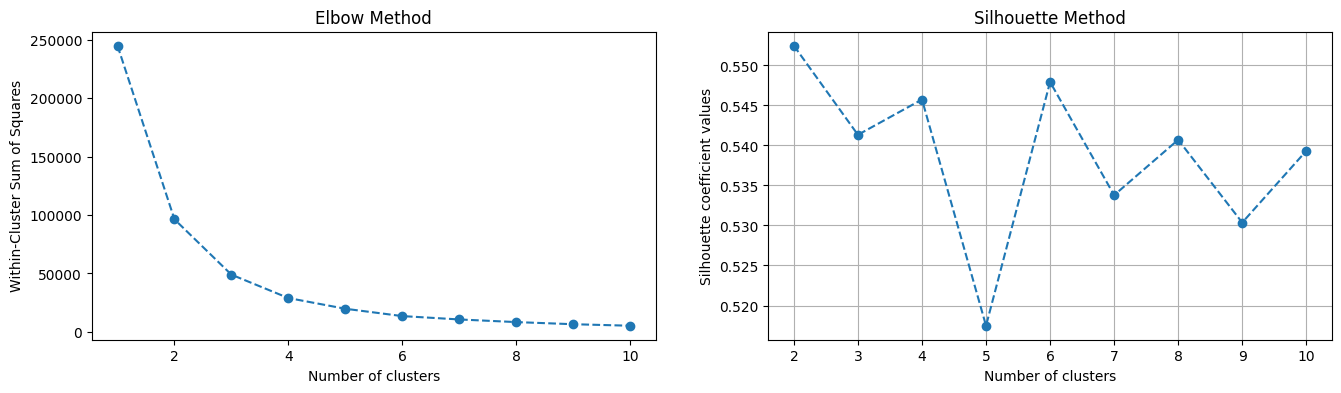

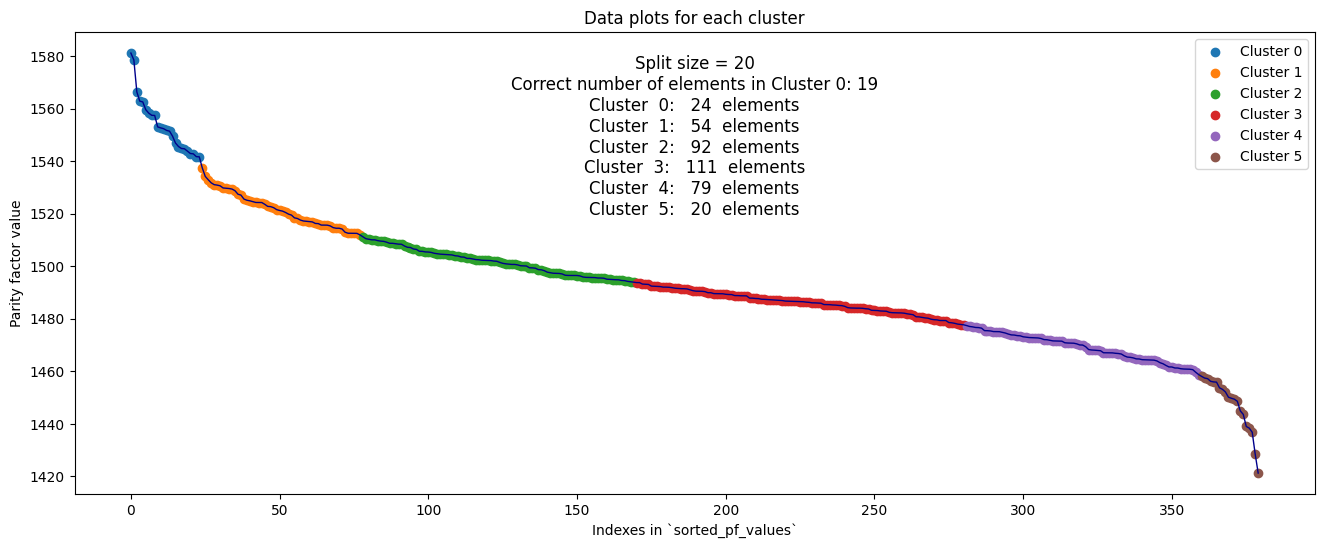

20 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 21 =========================================================================


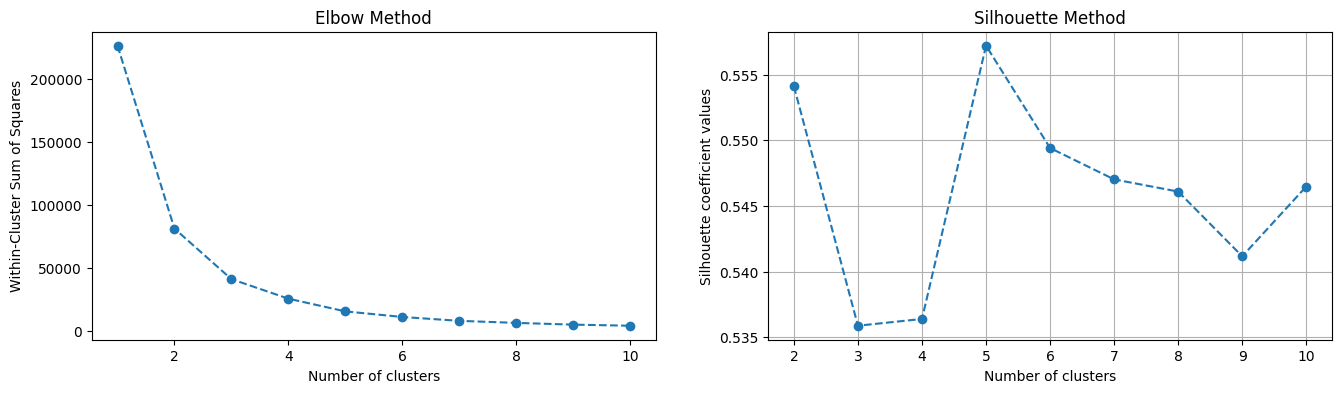

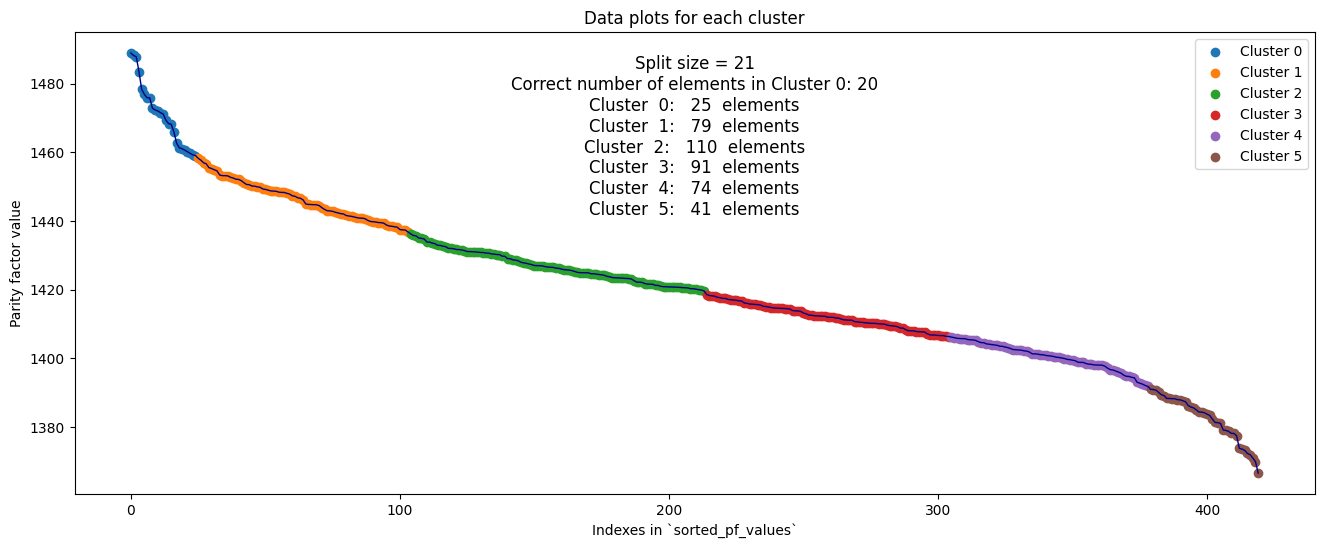

21 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 22 =========================================================================


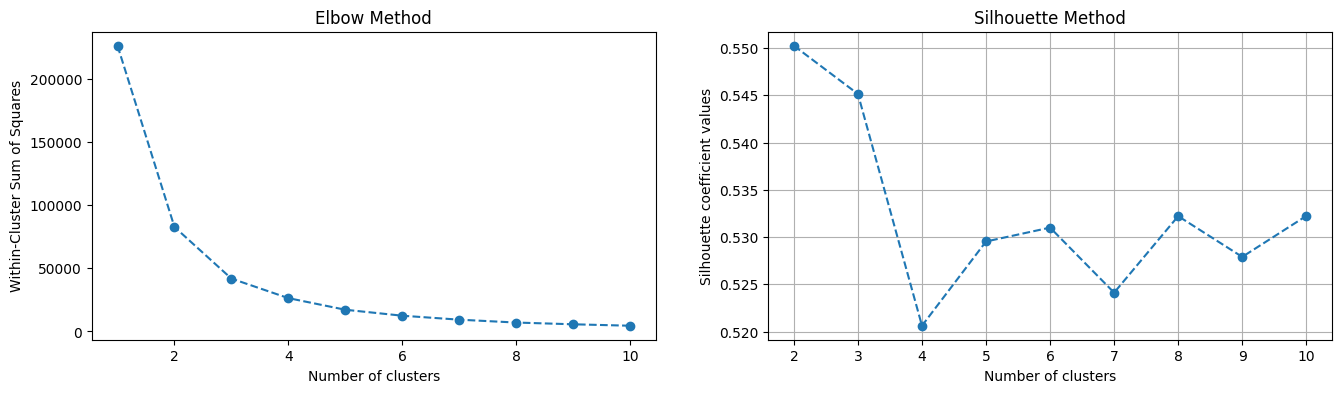

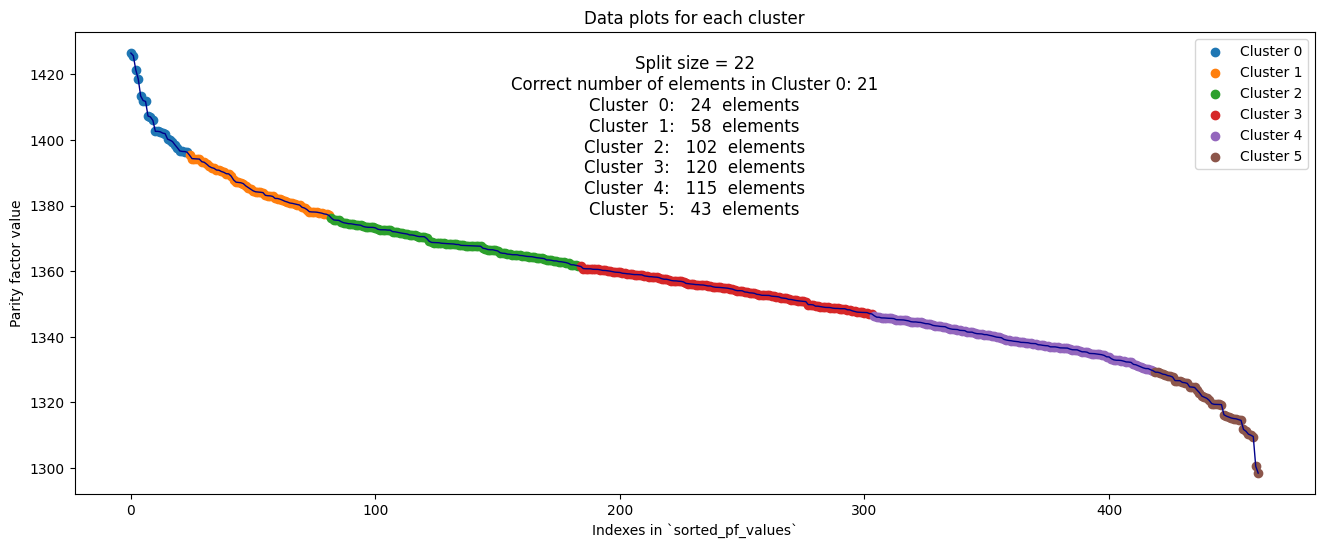

22 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 23 =========================================================================


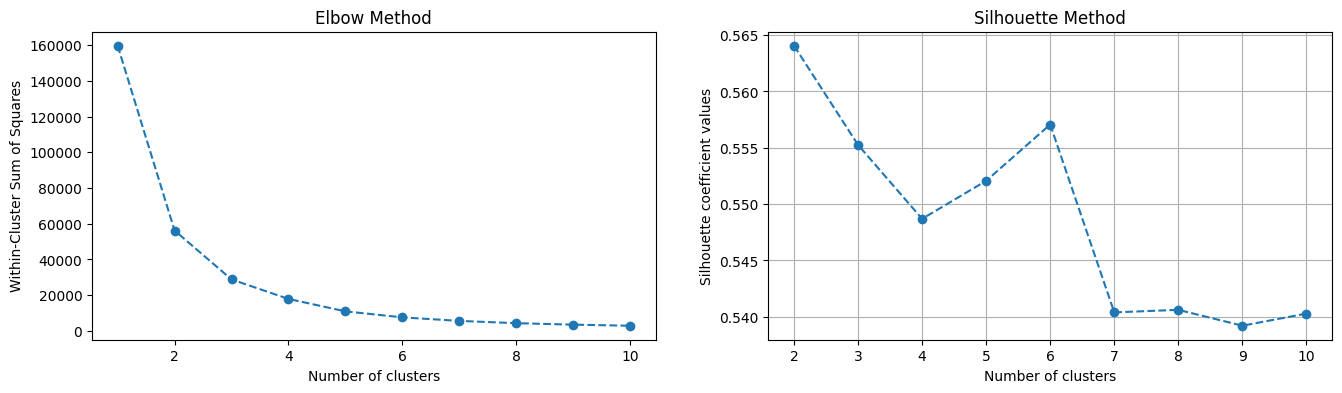

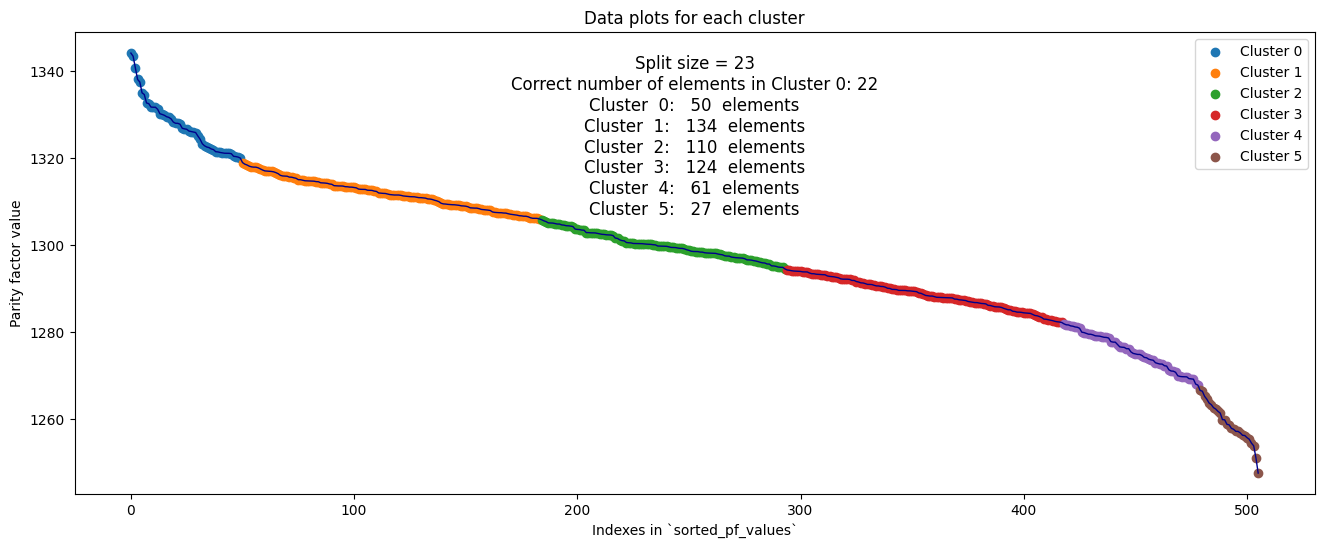

23 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 24 =========================================================================


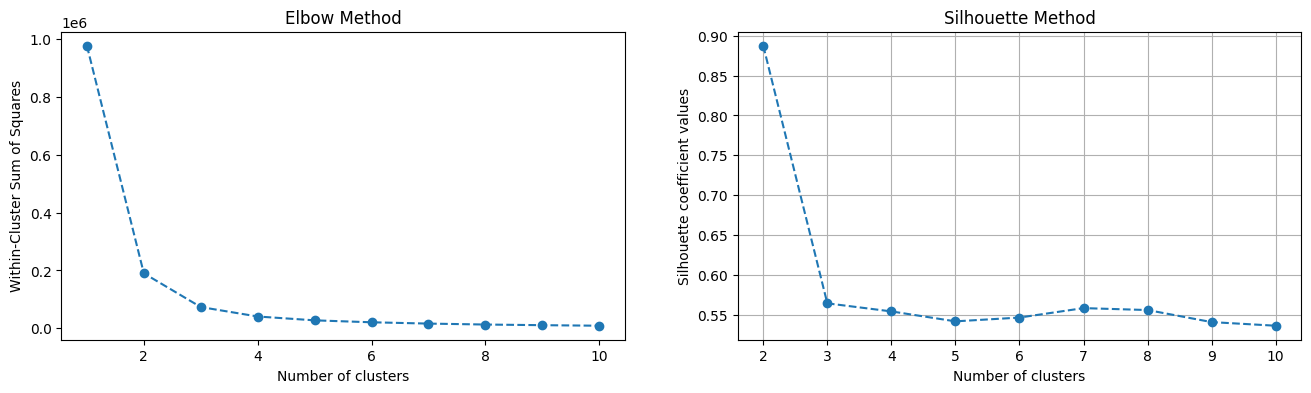

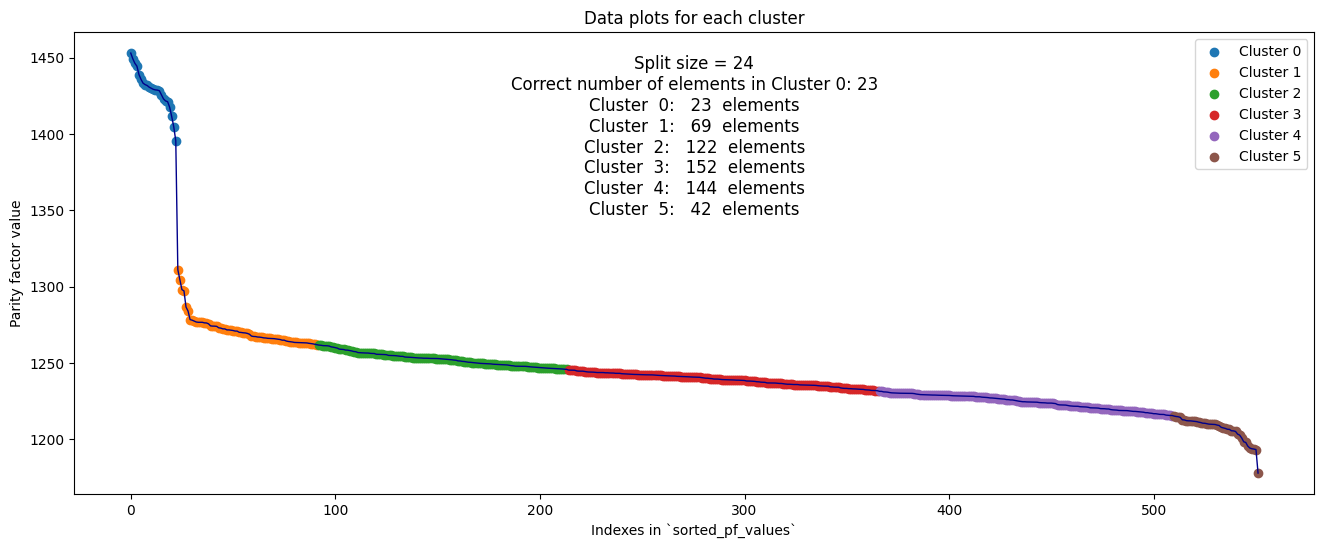

10 (18, 17) [18, 17]
19 (20, 18) [20, 18, 17]
12 (19, 20) [19, 20, 18, 17]
7 (2, 19) [2, 19, 20, 18, 17]
18 (10, 2) [10, 2, 19, 20, 18, 17]
16 (9, 10) [9, 10, 2, 19, 20, 18, 17]
9 (21, 9) [21, 9, 10, 2, 19, 20, 18, 17]
21 (8, 21) [8, 21, 9, 10, 2, 19, 20, 18, 17]
15 (12, 8) [12, 8, 21, 9, 10, 2, 19, 20, 18, 17]
0 (7, 12) [7, 12, 8, 21, 9, 10, 2, 19, 20, 18, 17]
2 (5, 7) [5, 7, 12, 8, 21, 9, 10, 2, 19, 20, 18, 17]
17 (16, 5) [16, 5, 7, 12, 8, 21, 9, 10, 2, 19, 20, 18, 17]
14 (22, 16) [22, 16, 5, 7, 12, 8, 21, 9, 10, 2, 19, 20, 18, 17]
22 (24, 22) [24, 22, 16, 5, 7, 12, 8, 21, 9, 10, 2, 19, 20, 18, 17]
20 (11, 24) [11, 24, 22, 16, 5, 7, 12, 8, 21, 9, 10, 2, 19, 20, 18, 17]
1 (1, 11) [1, 11, 24, 22, 16, 5, 7, 12, 8, 21, 9, 10, 2, 19, 20, 18, 17]
6 (15, 1) [15, 1, 11, 24, 22, 16, 5, 7, 12, 8, 21, 9, 10, 2, 19, 20, 18, 17]
11 (6, 15) [6, 15, 1, 11, 24, 22, 16, 5, 7, 12, 8, 21, 9, 10, 2, 19, 20, 18, 17]
4 (3, 6) [3, 6, 15, 1, 11, 24, 22, 16, 5, 7, 12, 8, 21, 9, 10, 2, 19, 20, 18, 17]
5 (13, 

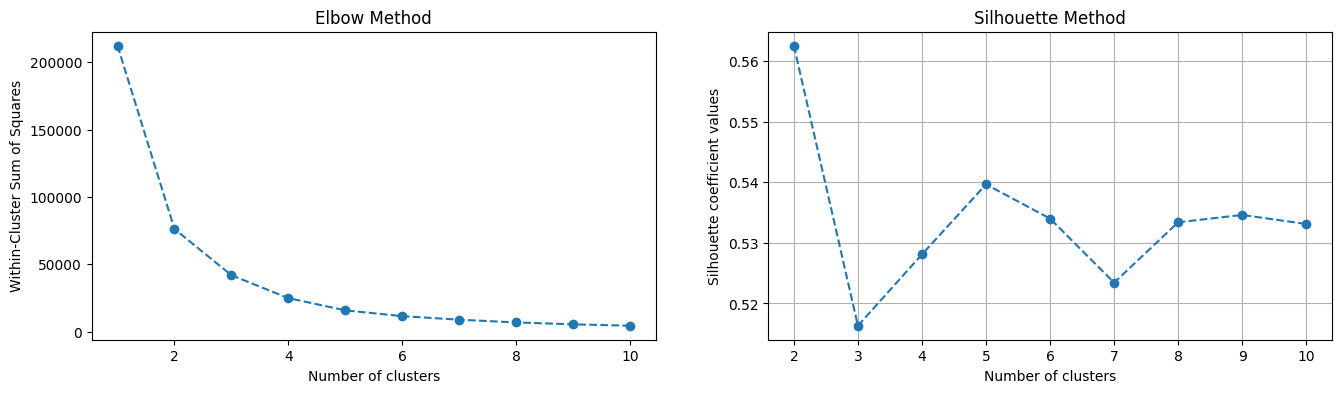

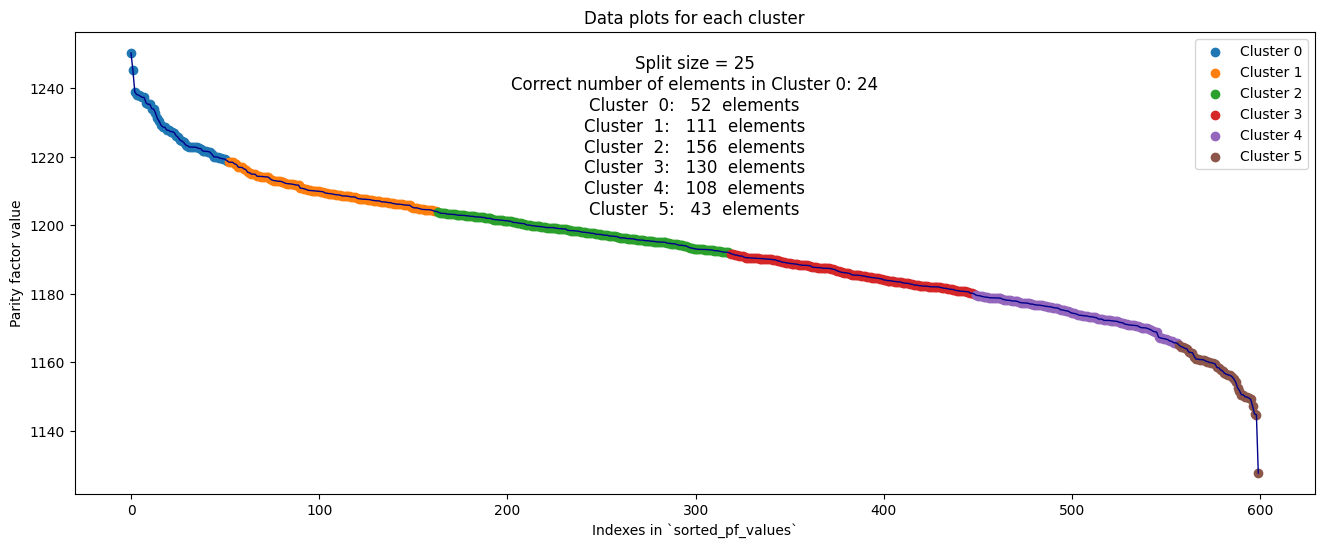

25 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 26 =========================================================================


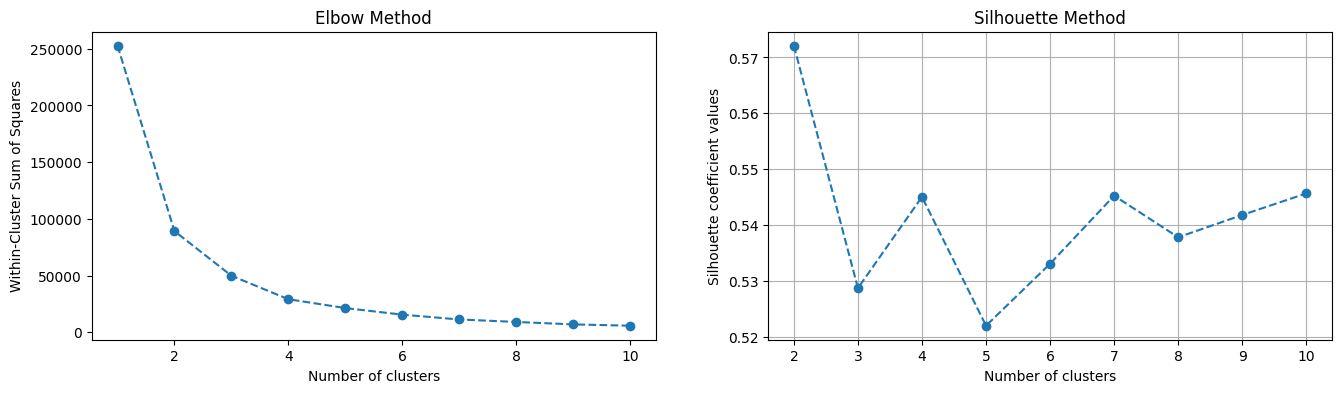

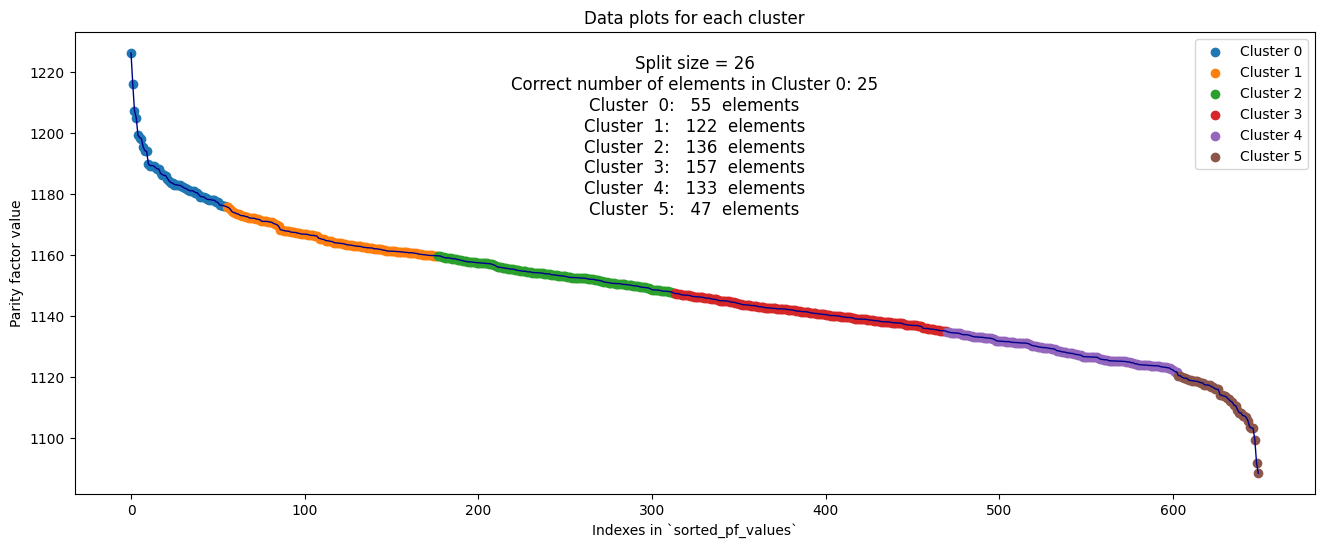

26 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 27 =========================================================================


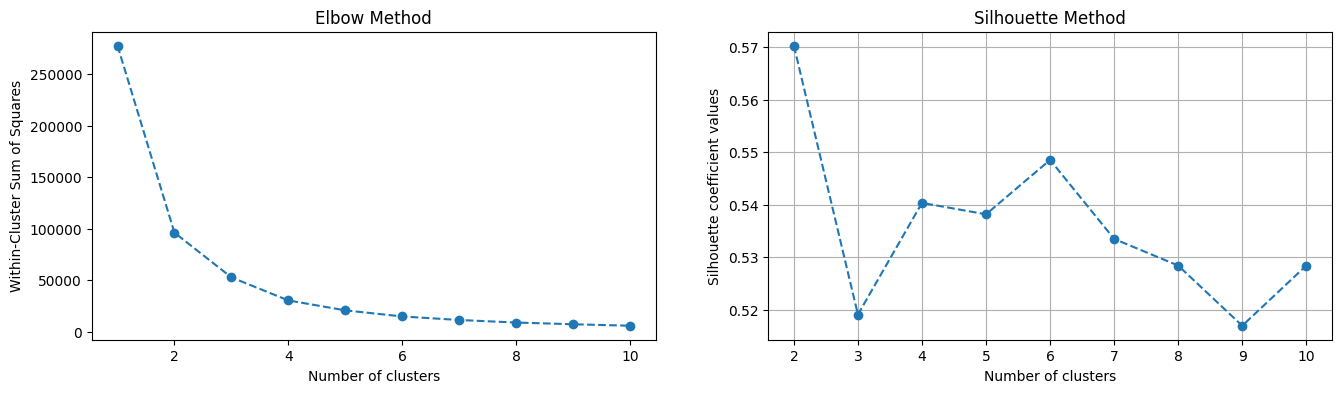

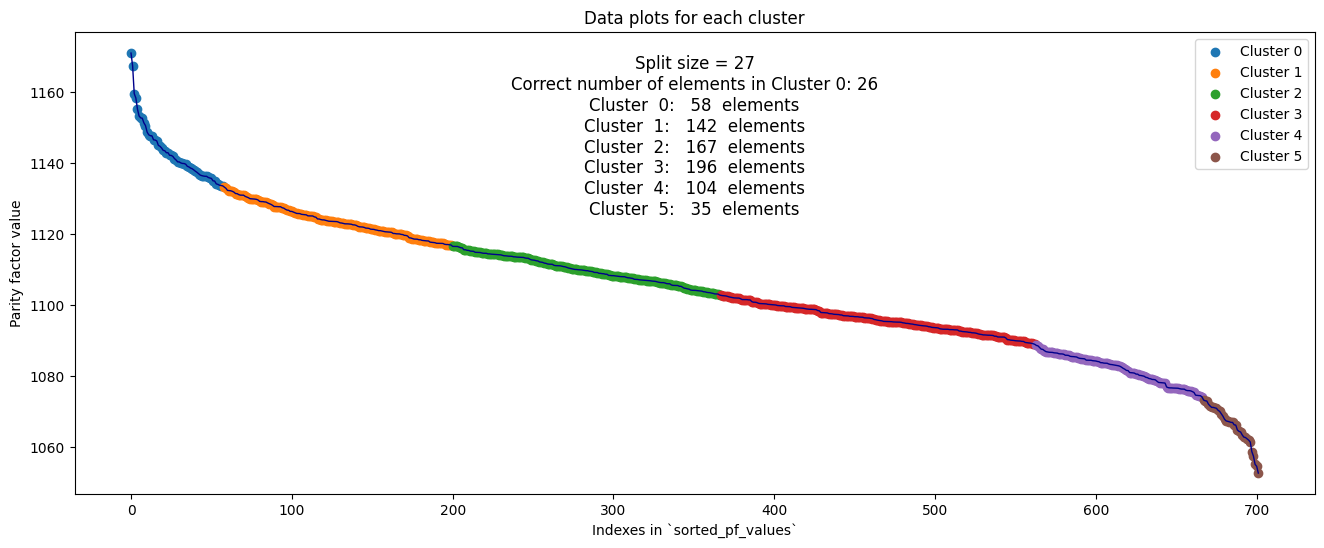

27 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 28 =========================================================================


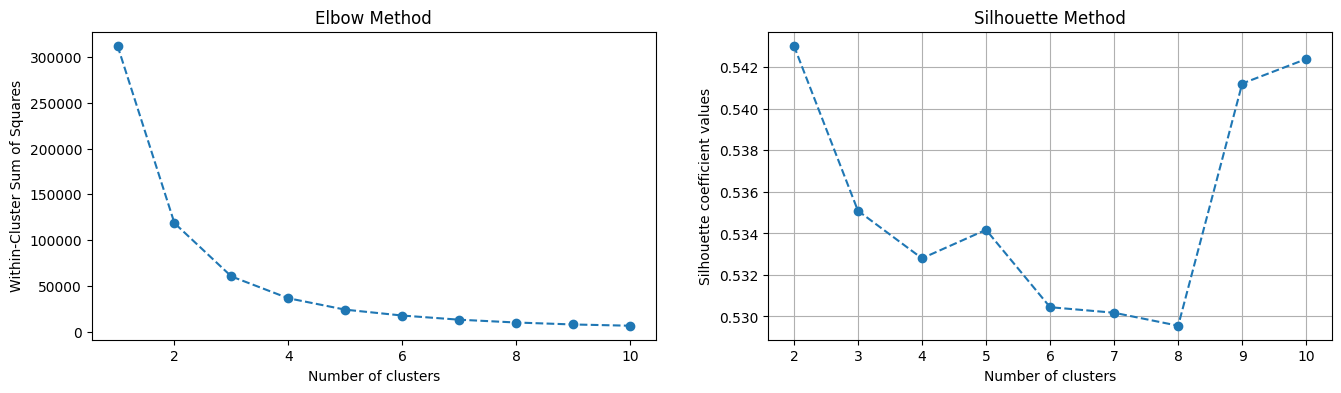

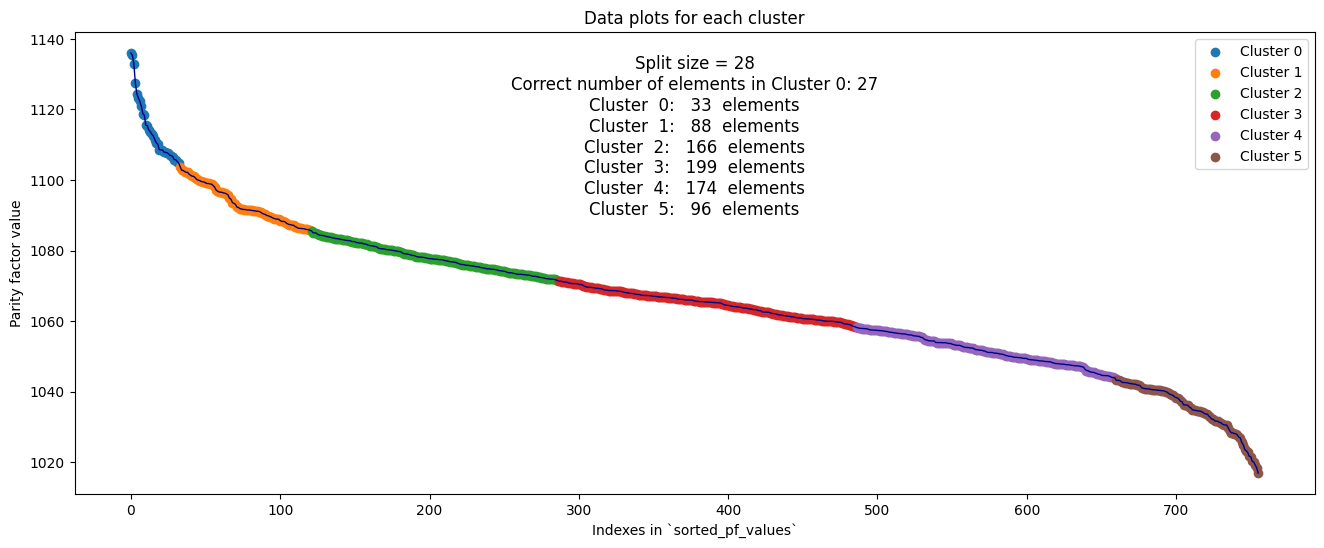

28 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 29 =========================================================================


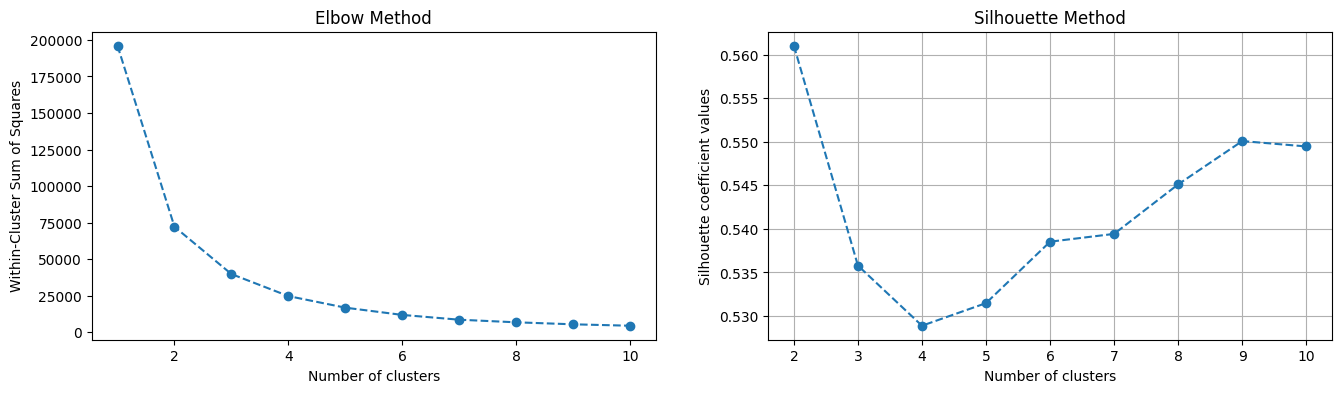

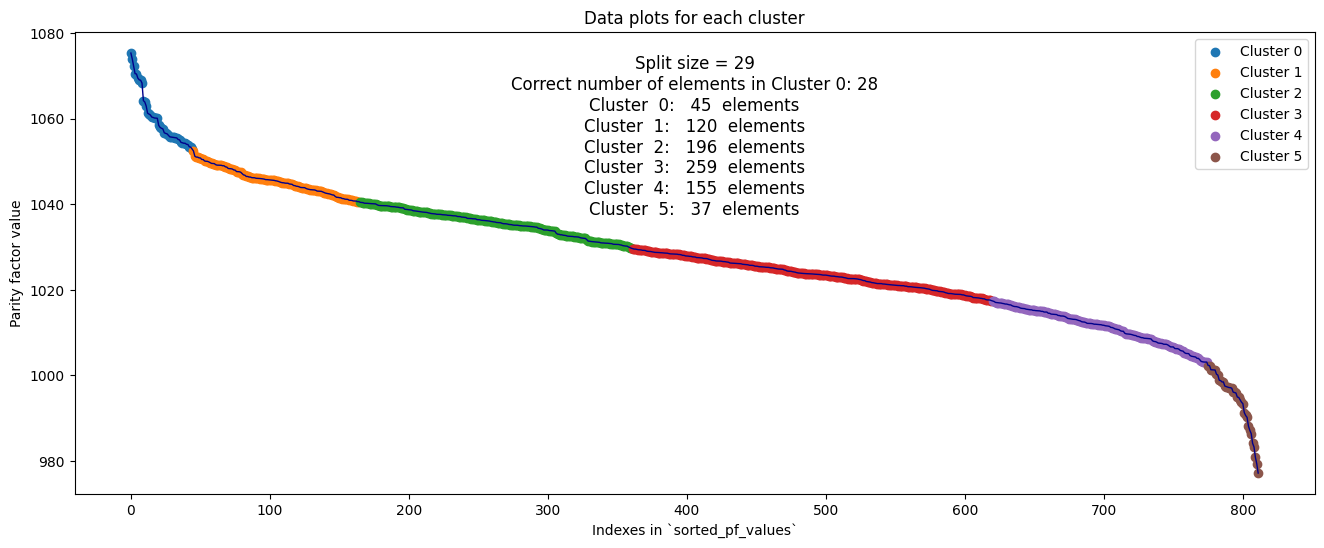

29 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 30 =========================================================================


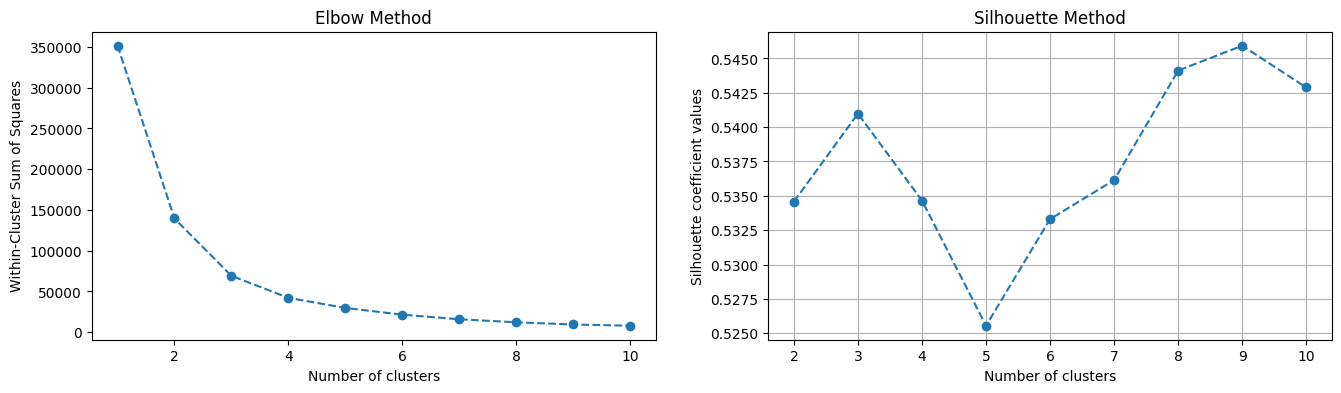

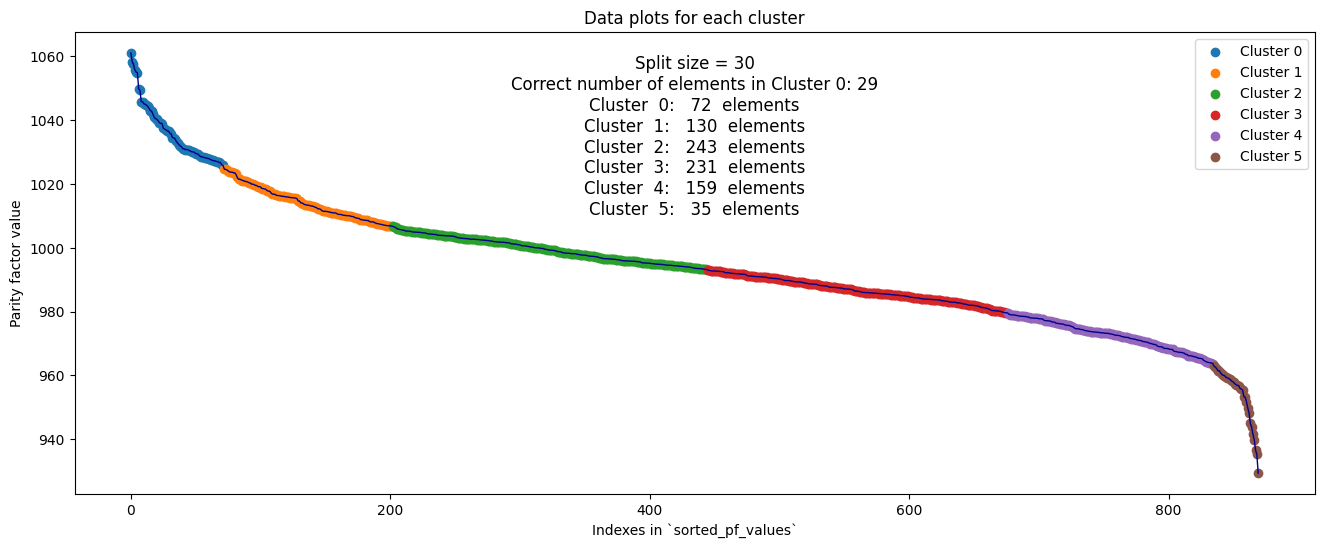

30 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 31 =========================================================================


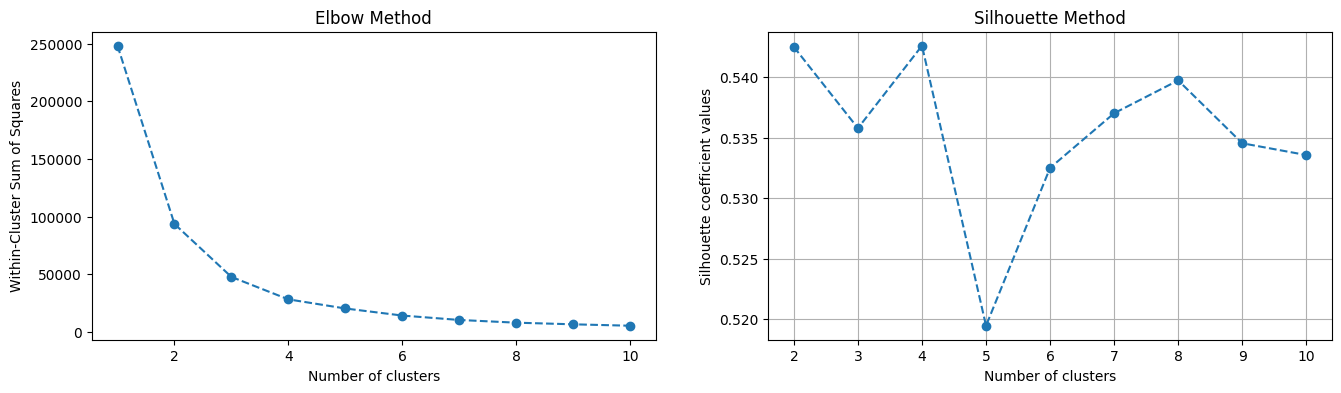

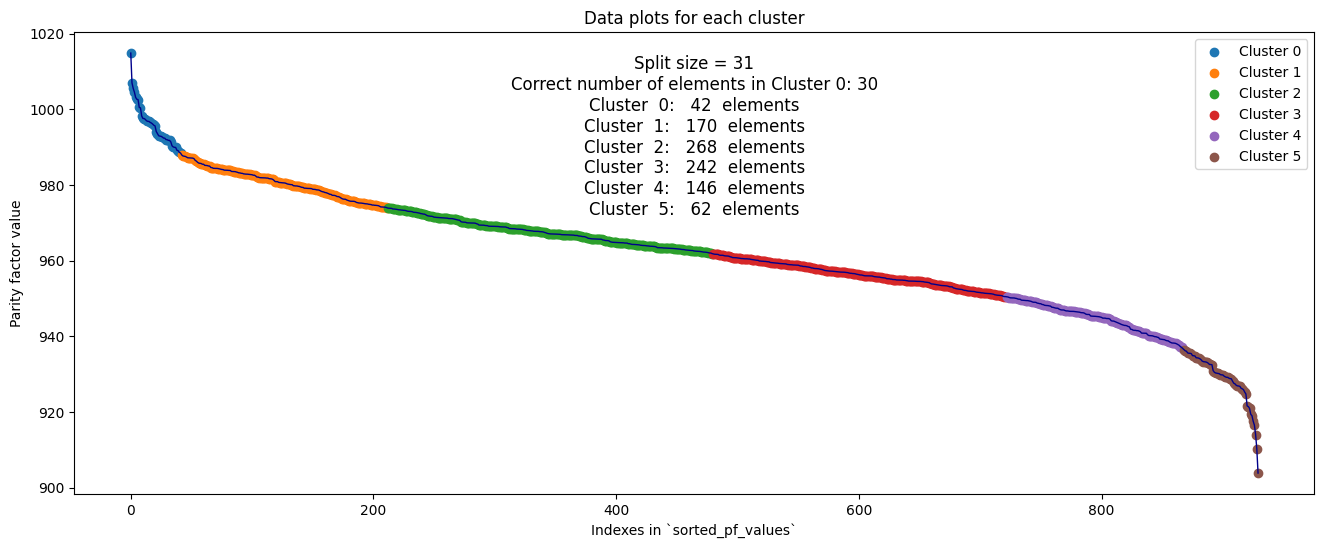

31 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 32 =========================================================================


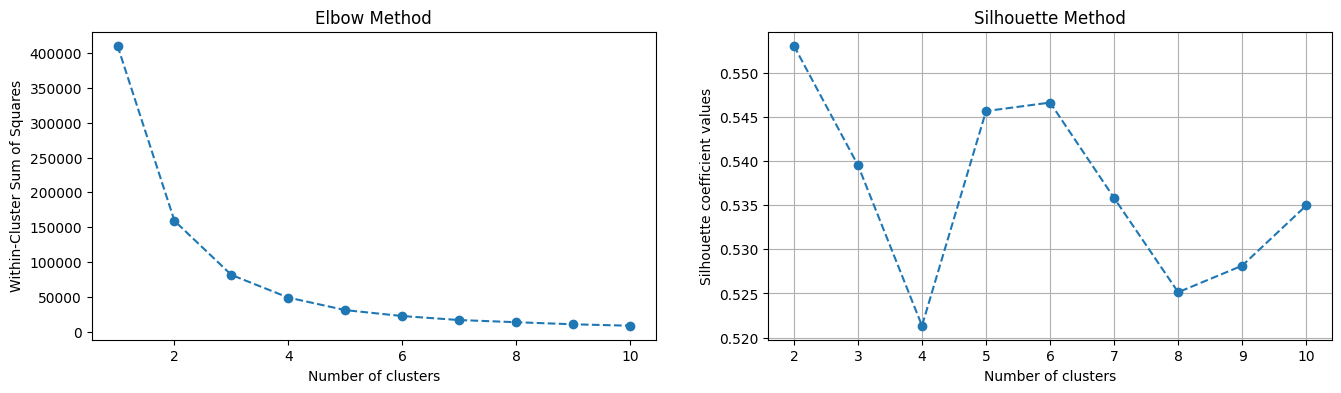

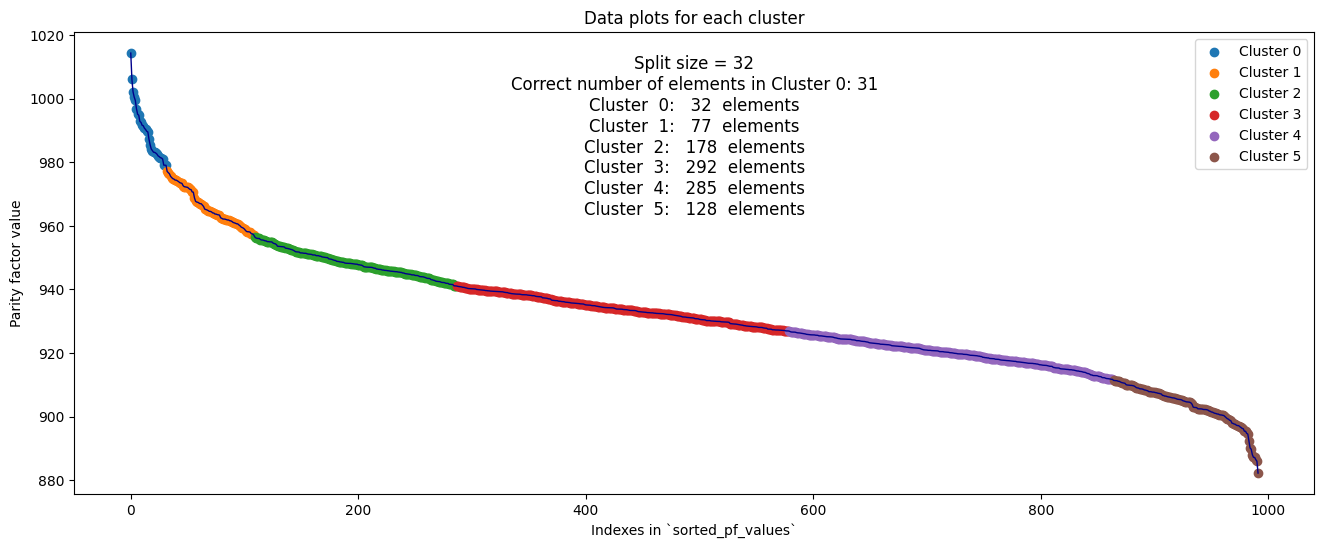

32 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 33 =========================================================================


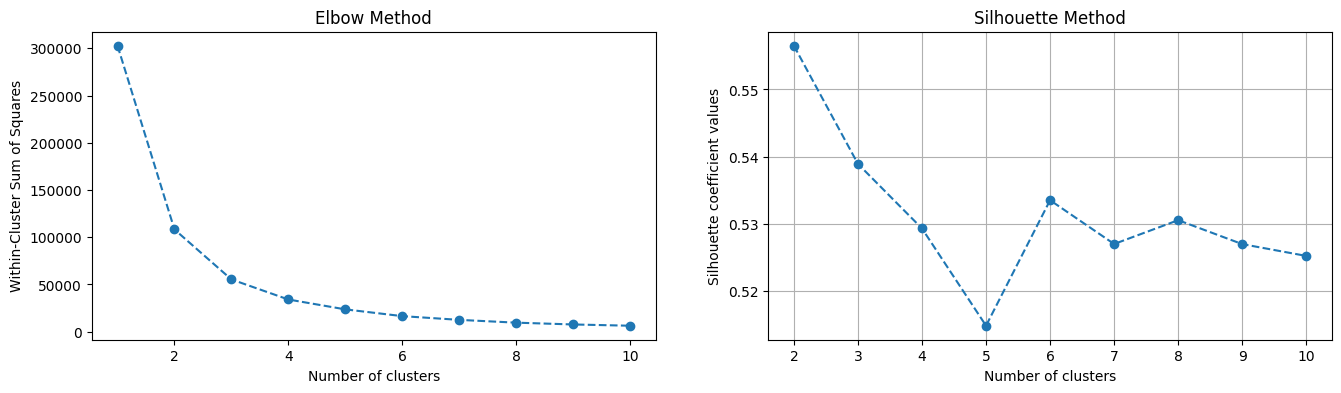

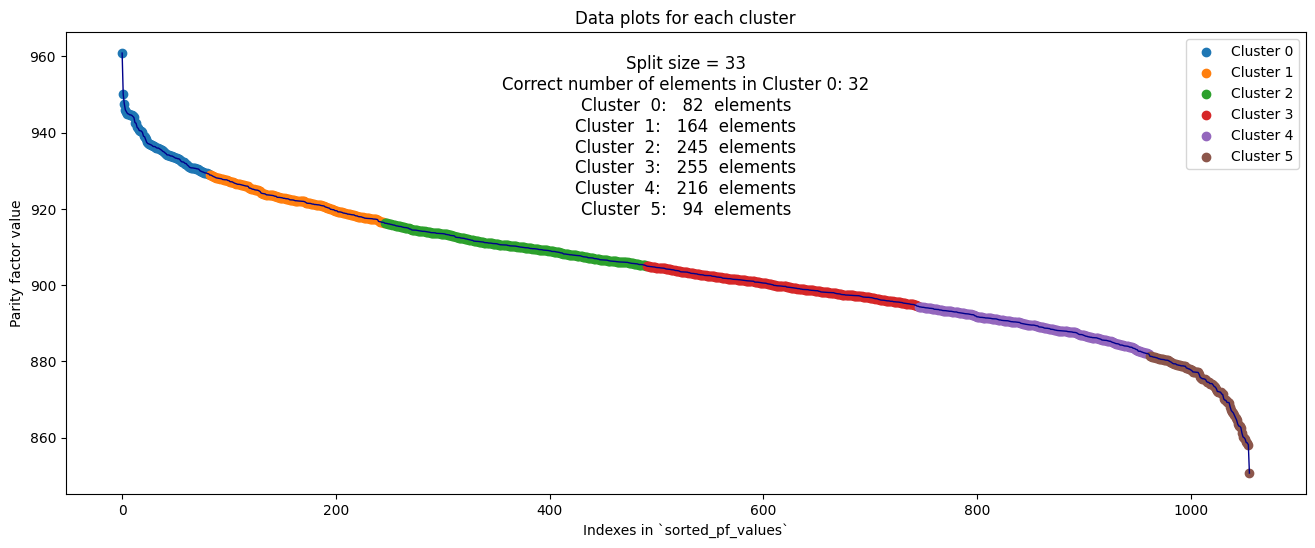

33 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 34 =========================================================================


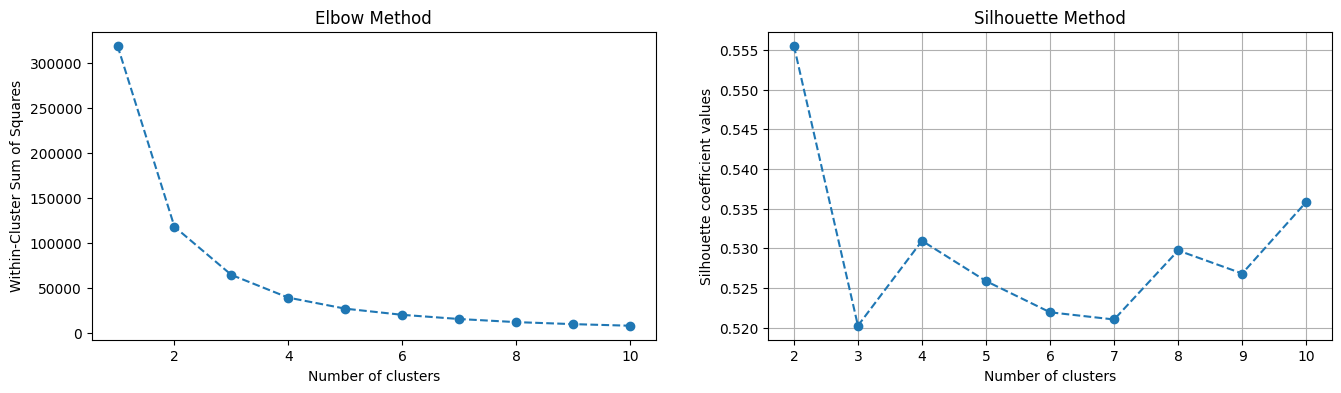

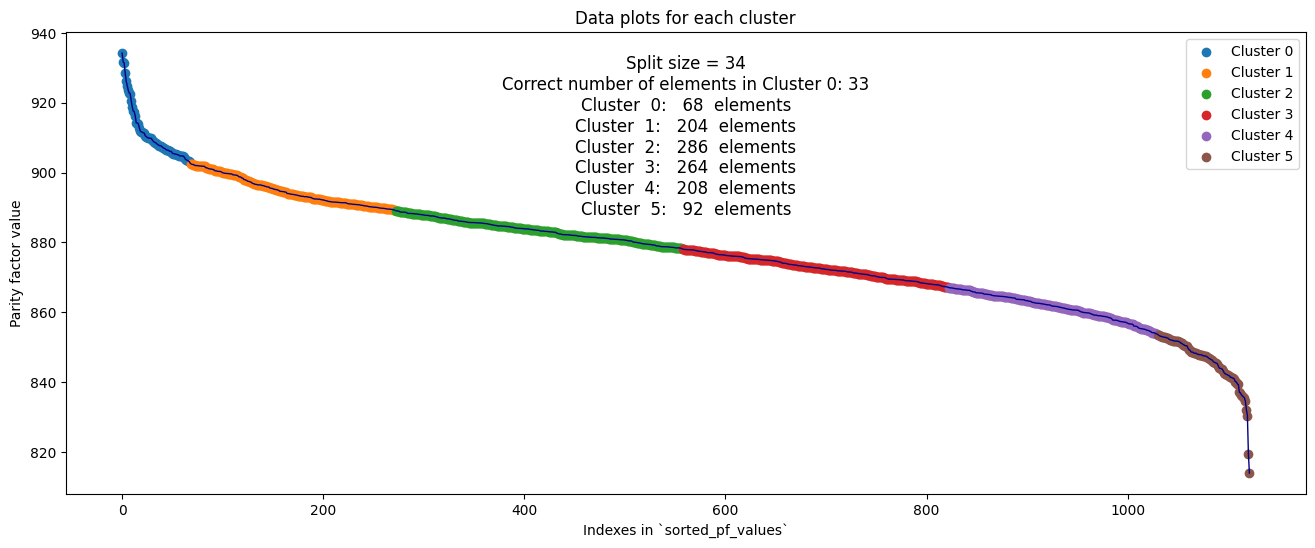

34 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 35 =========================================================================


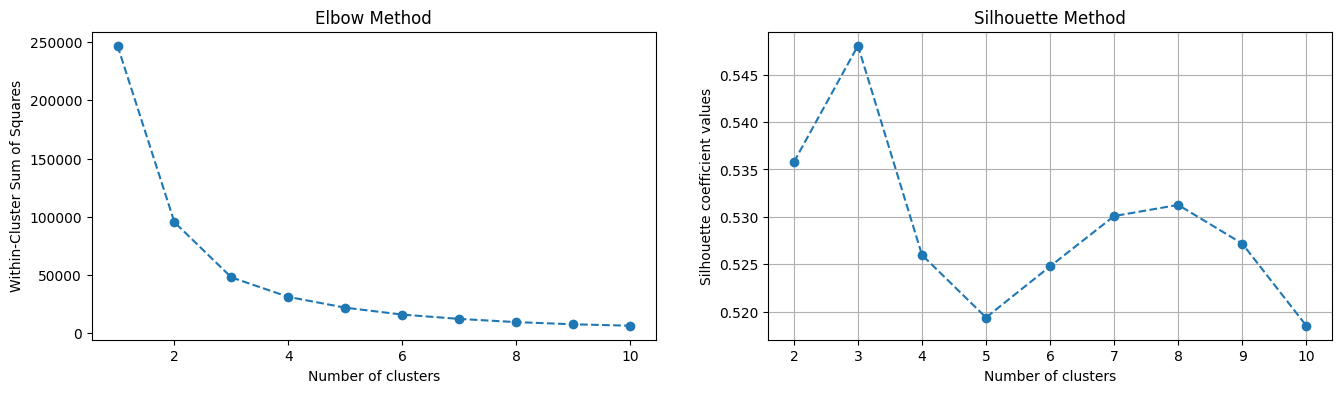

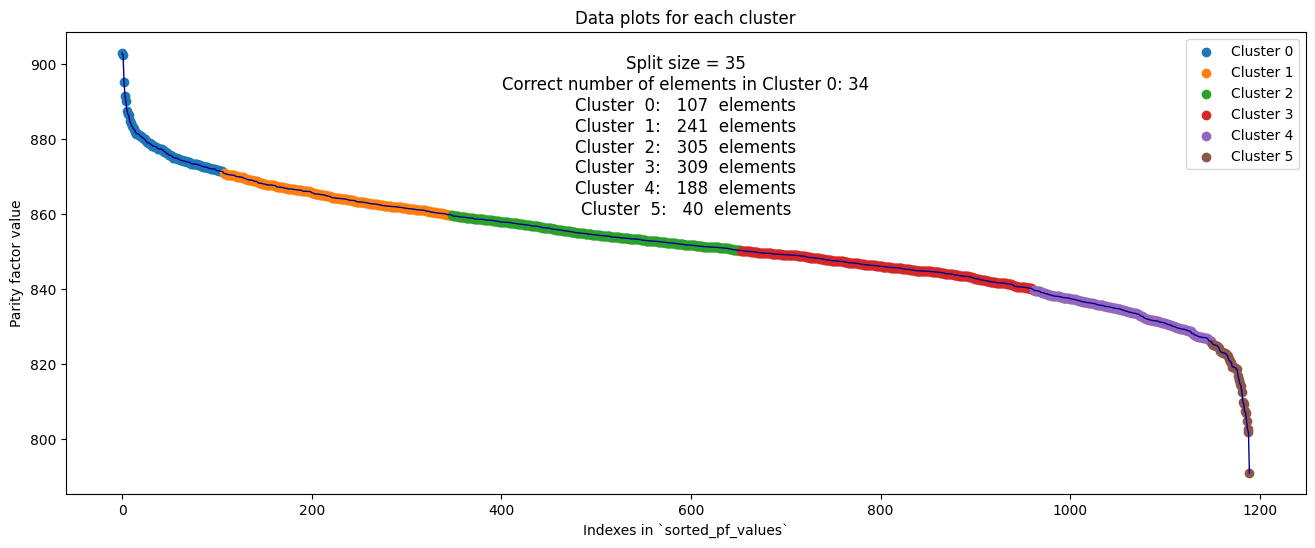

35 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 36 =========================================================================


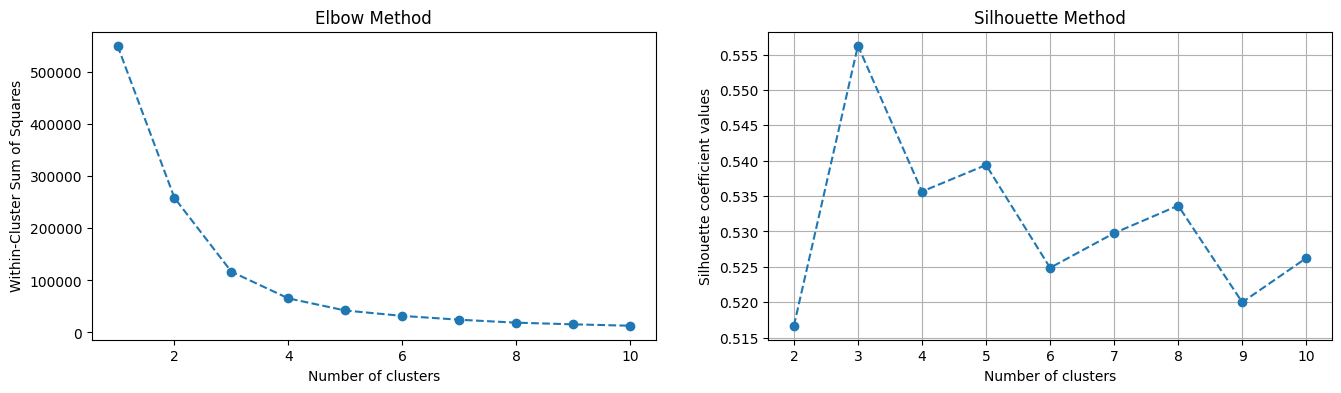

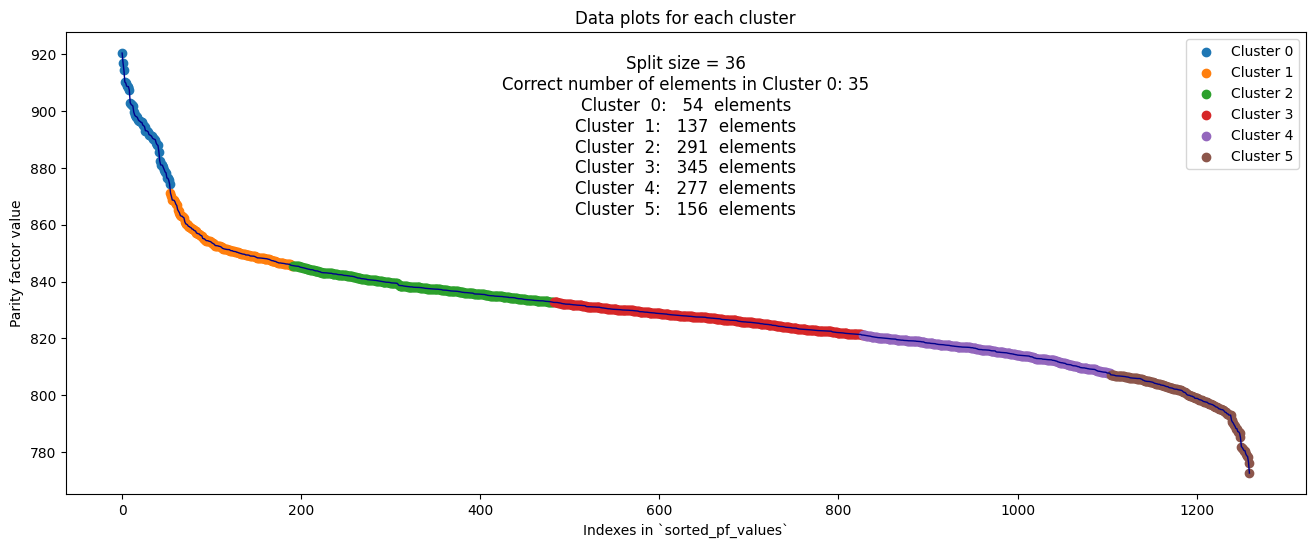

36 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 37 =========================================================================


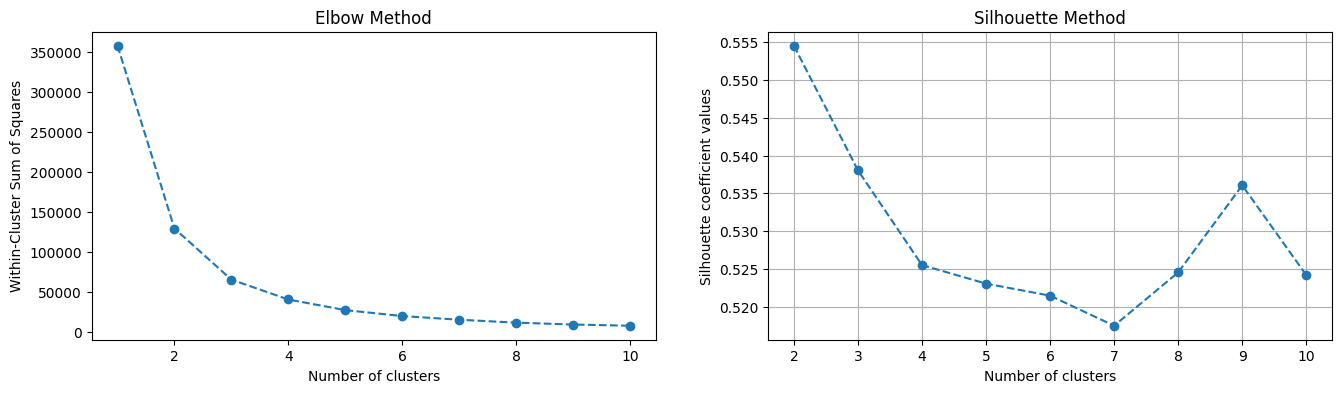

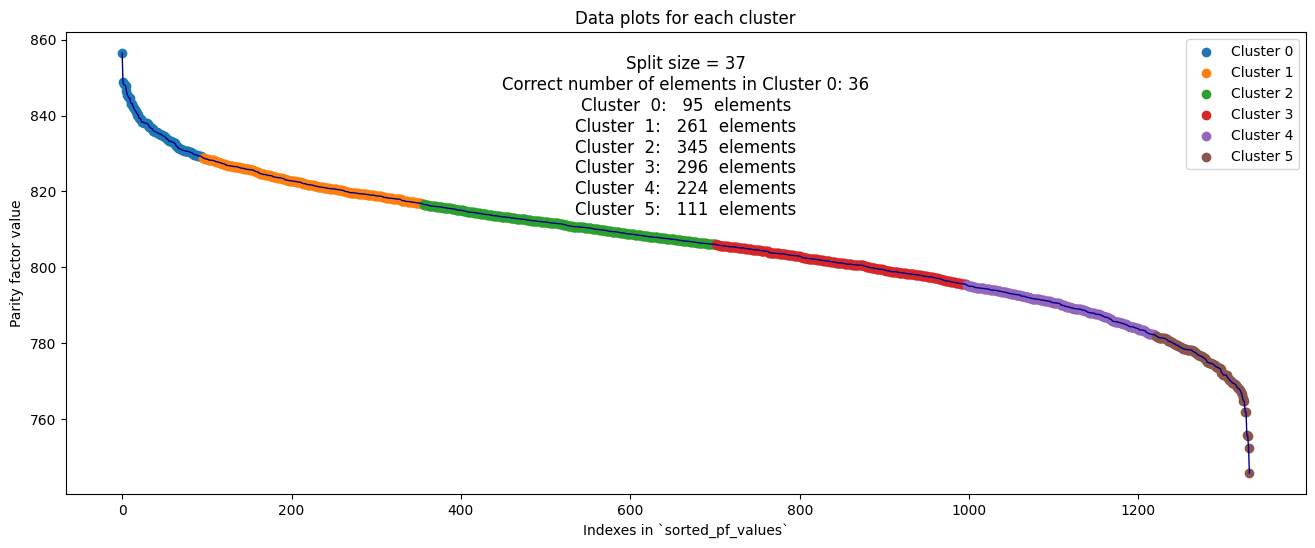

37 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 38 =========================================================================


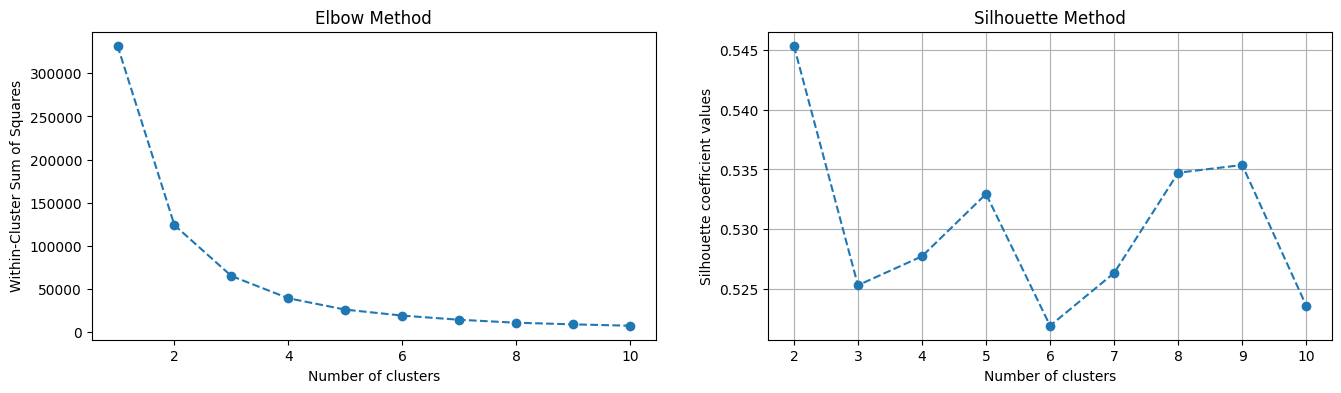

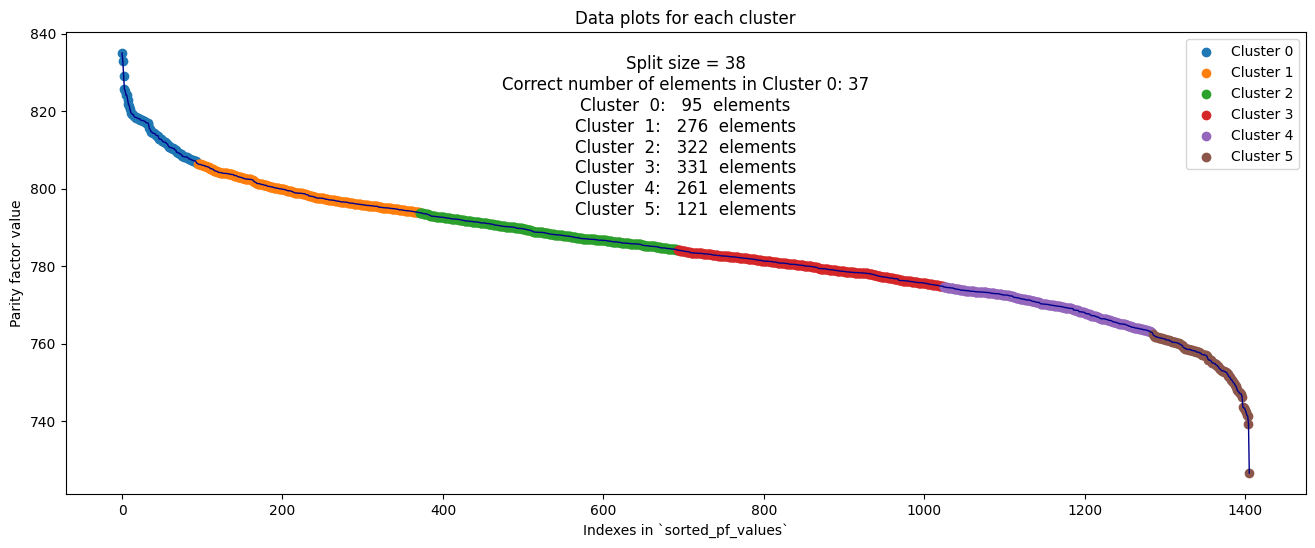

38 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 39 =========================================================================


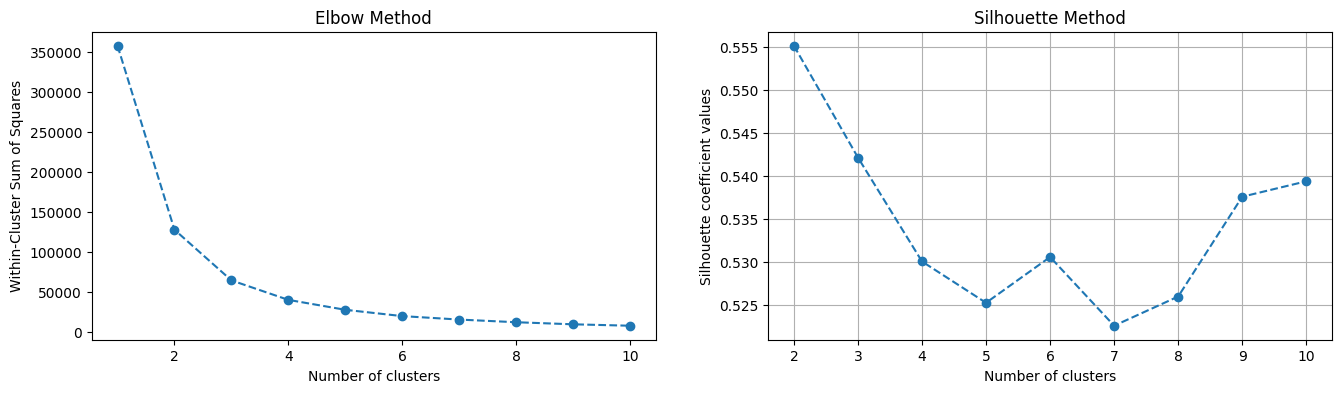

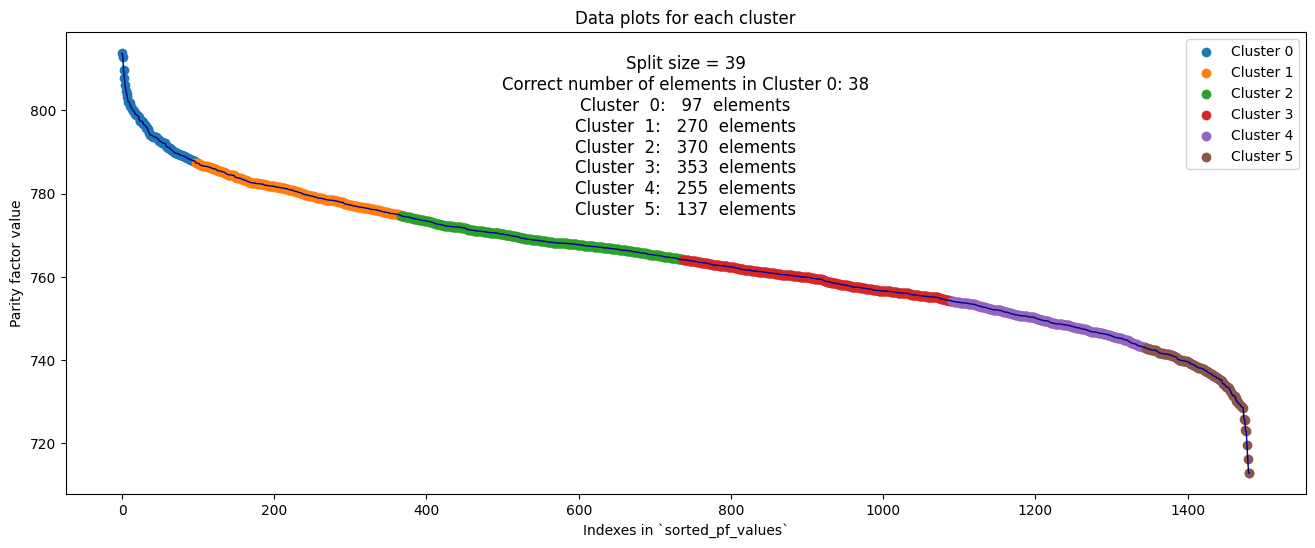

39 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 40 =========================================================================


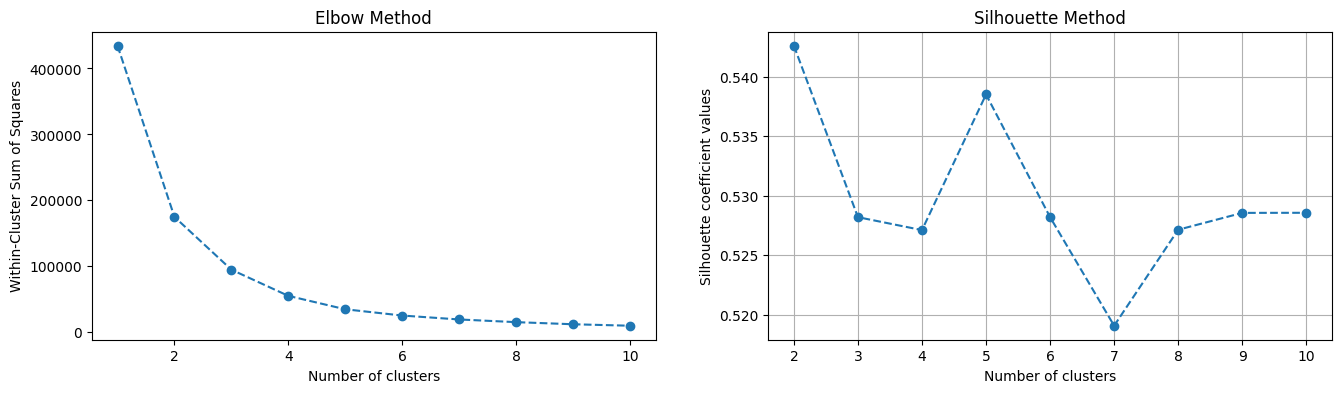

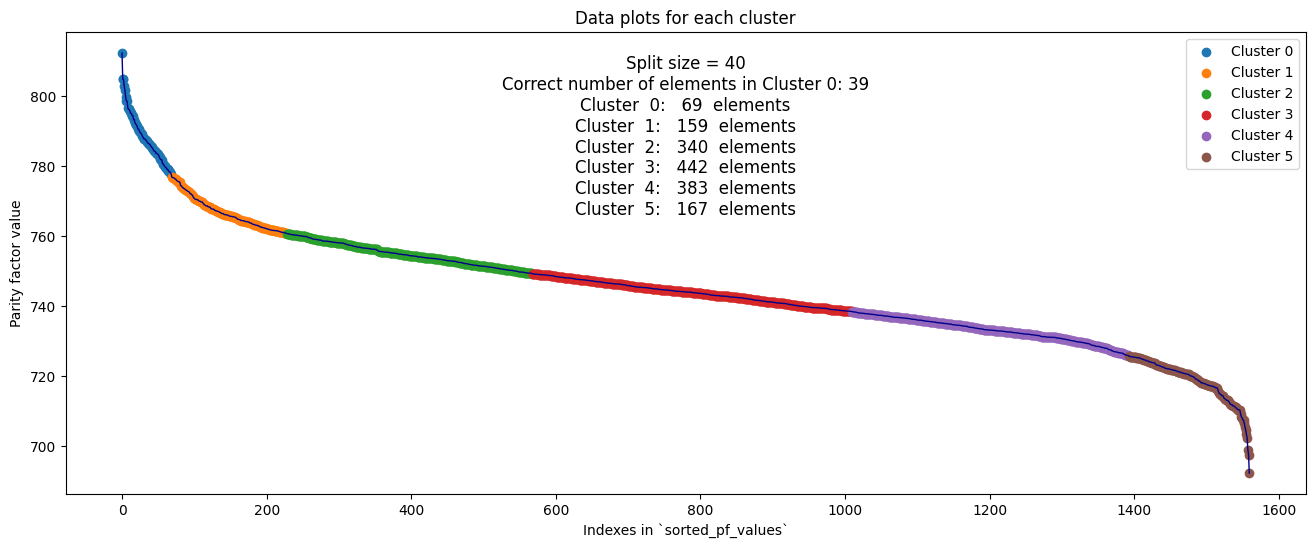

40 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 41 =========================================================================


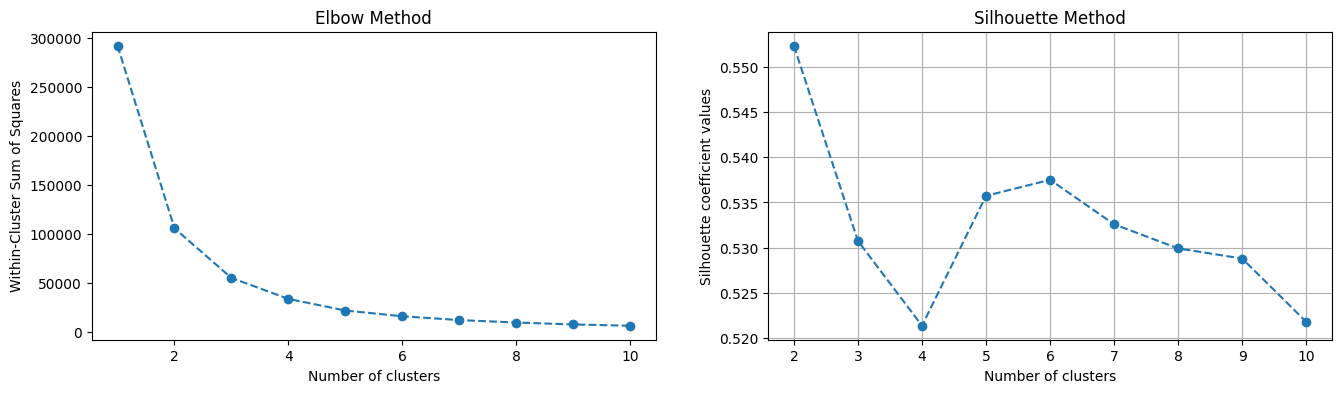

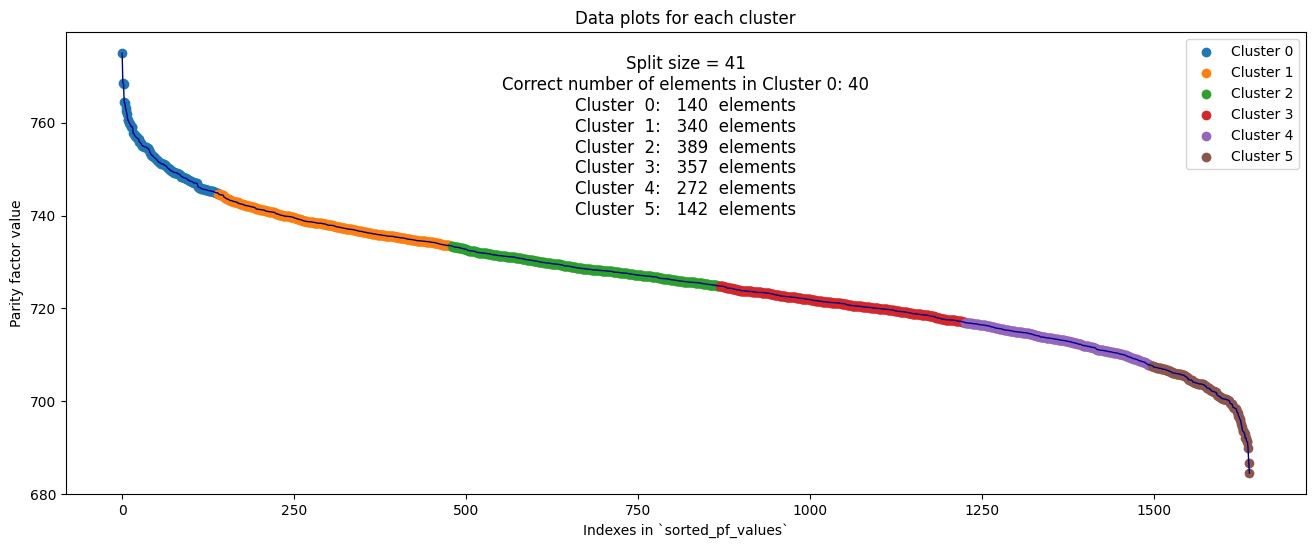

41 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 42 =========================================================================


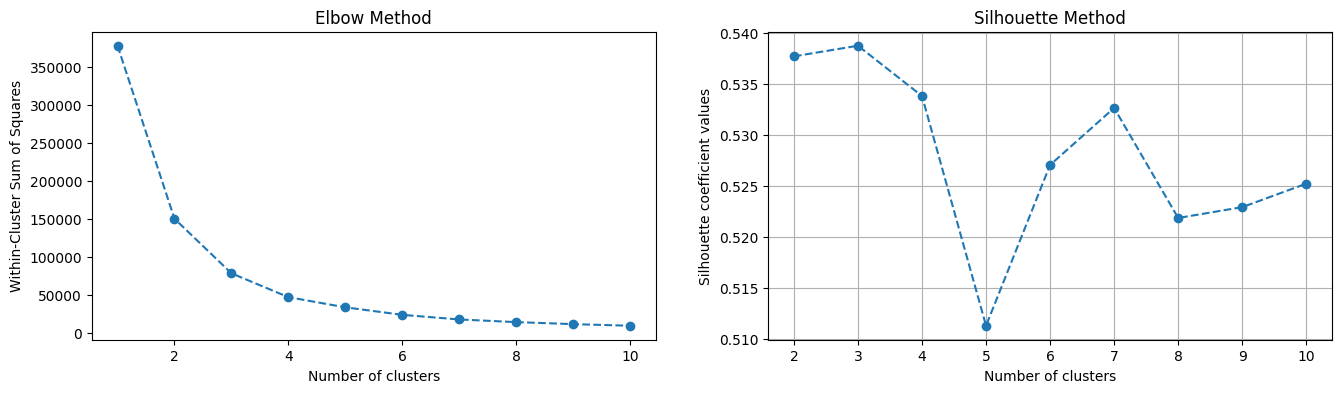

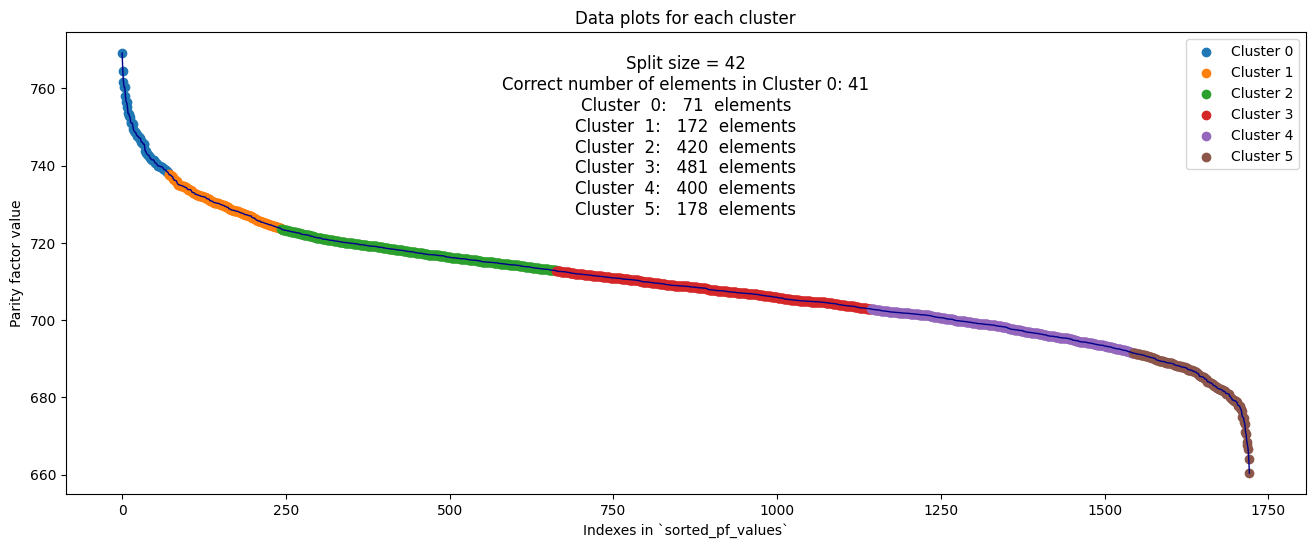

42 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 43 =========================================================================


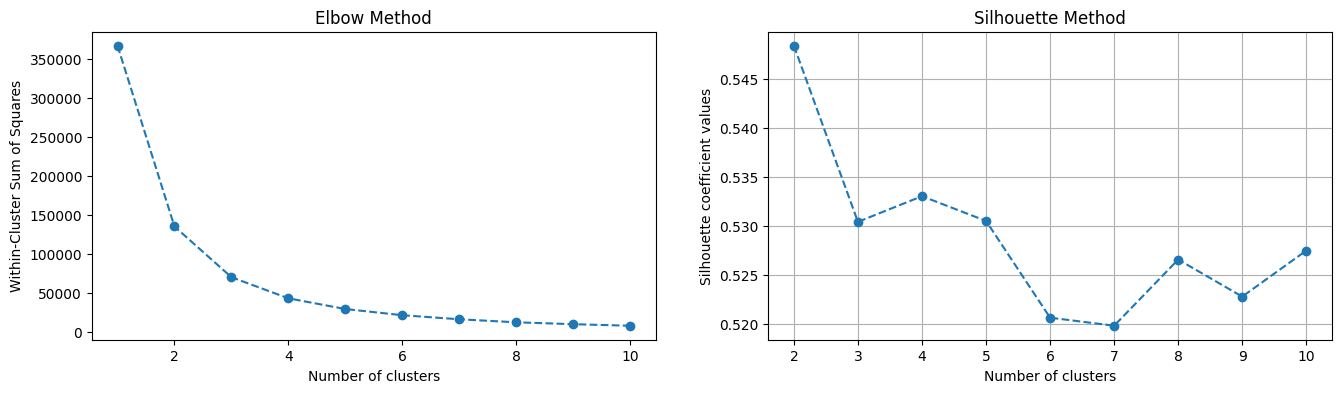

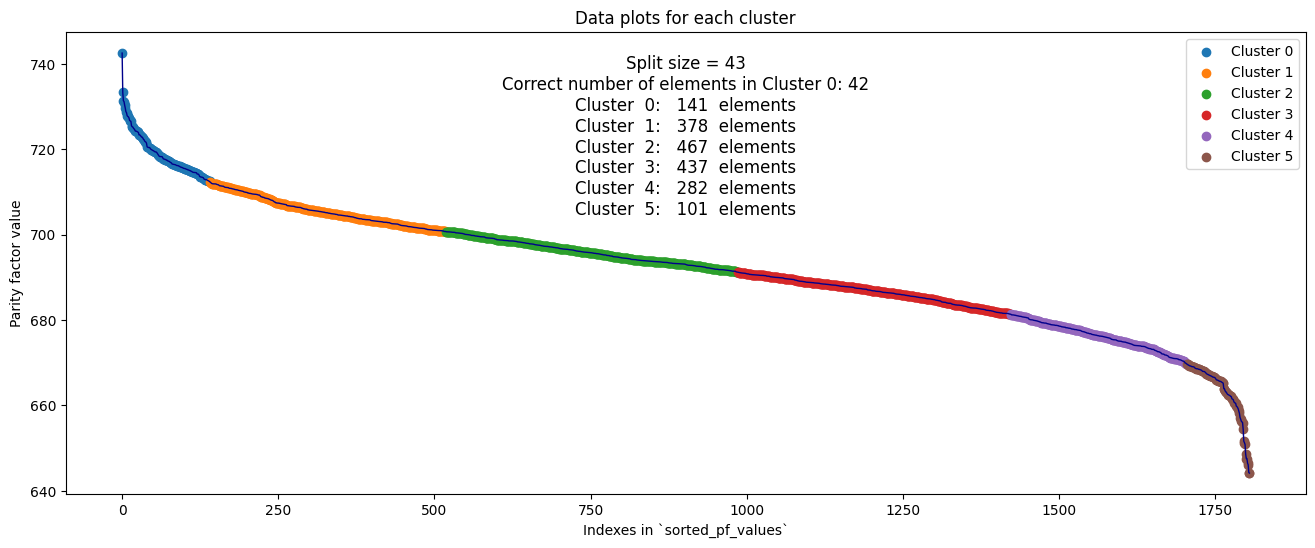

43 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 44 =========================================================================


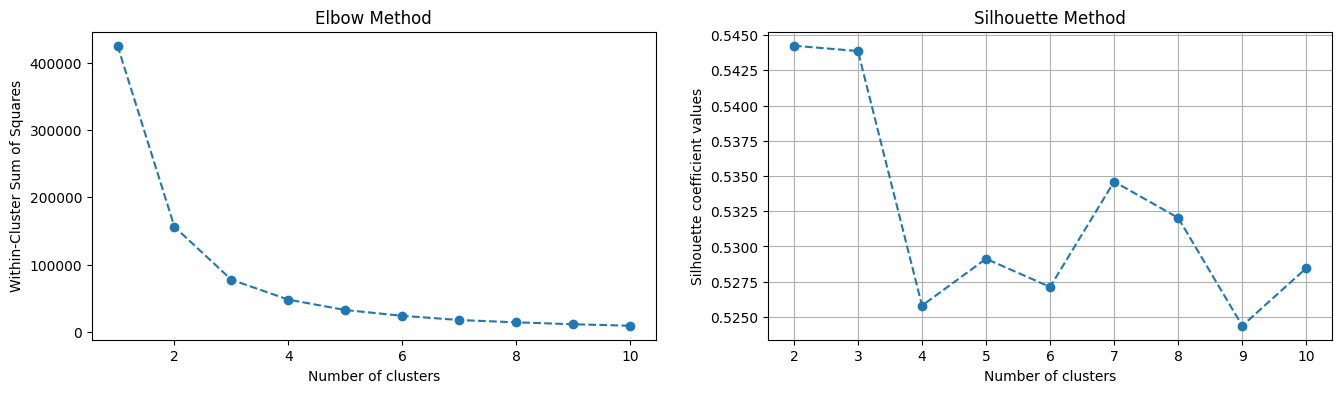

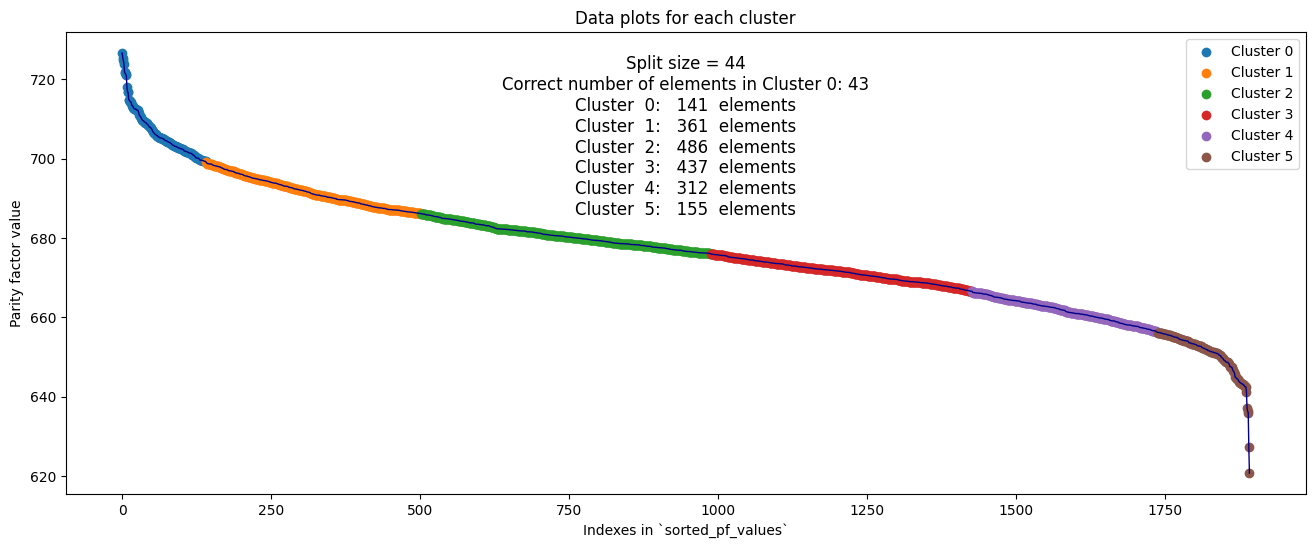

44 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 45 =========================================================================


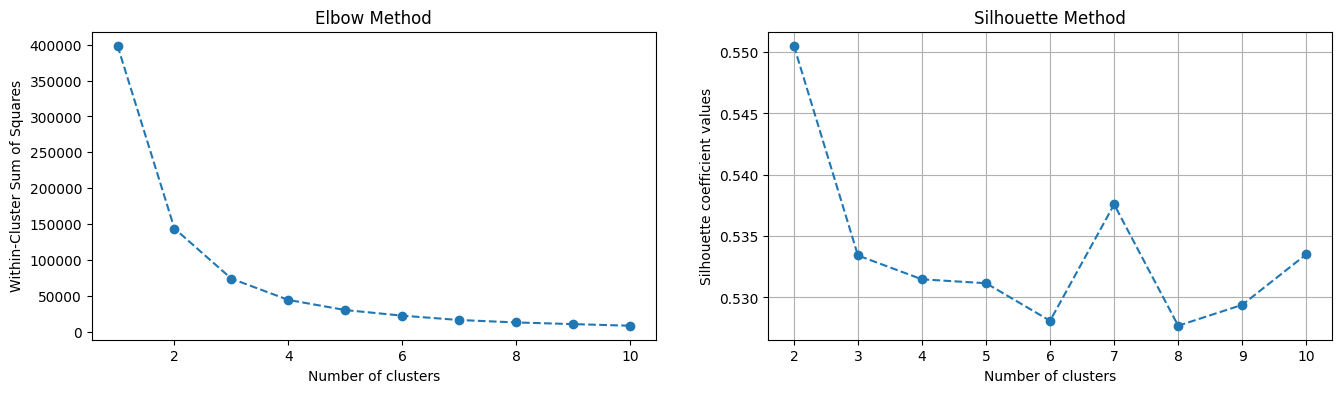

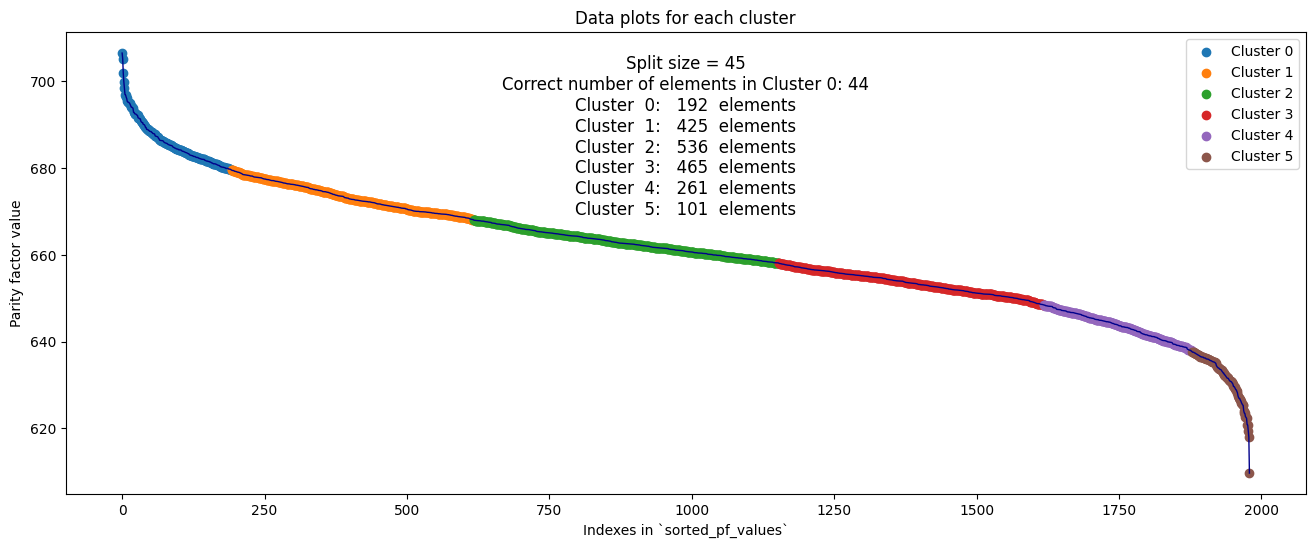

45 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 46 =========================================================================


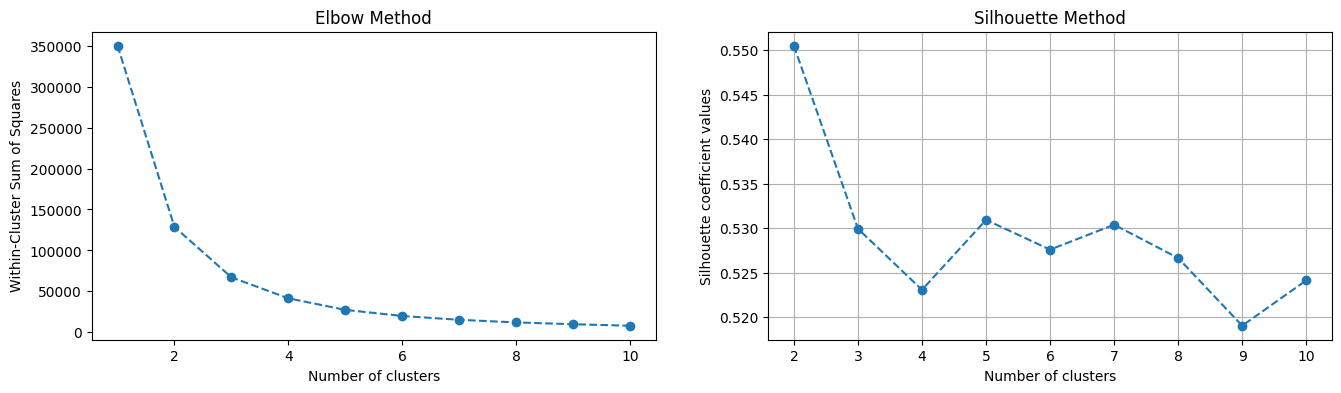

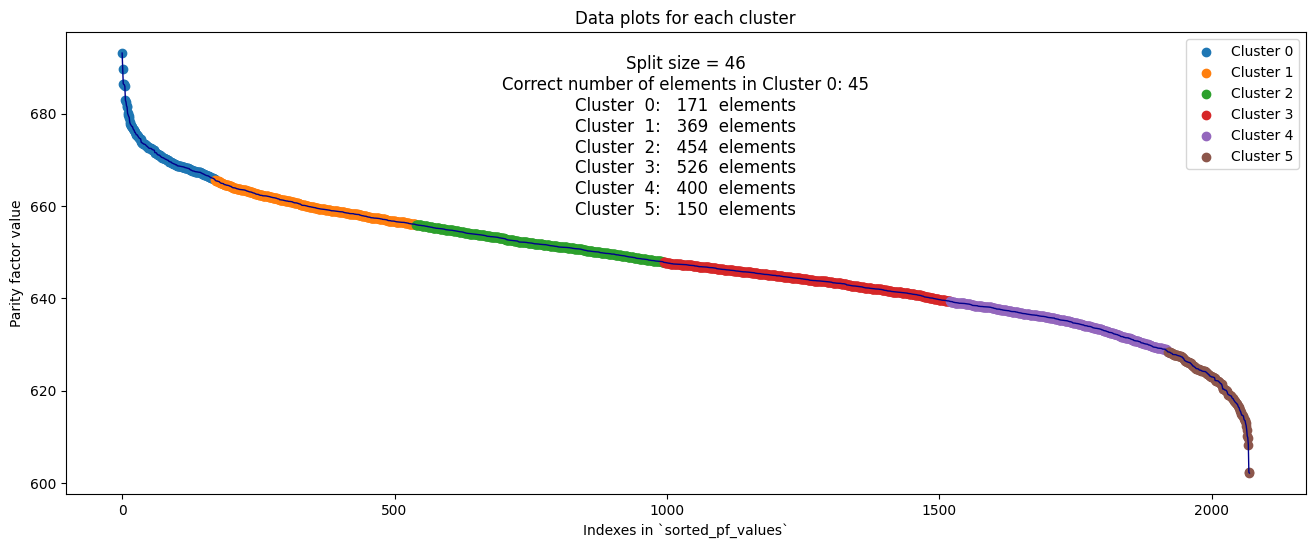

46 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 47 =========================================================================


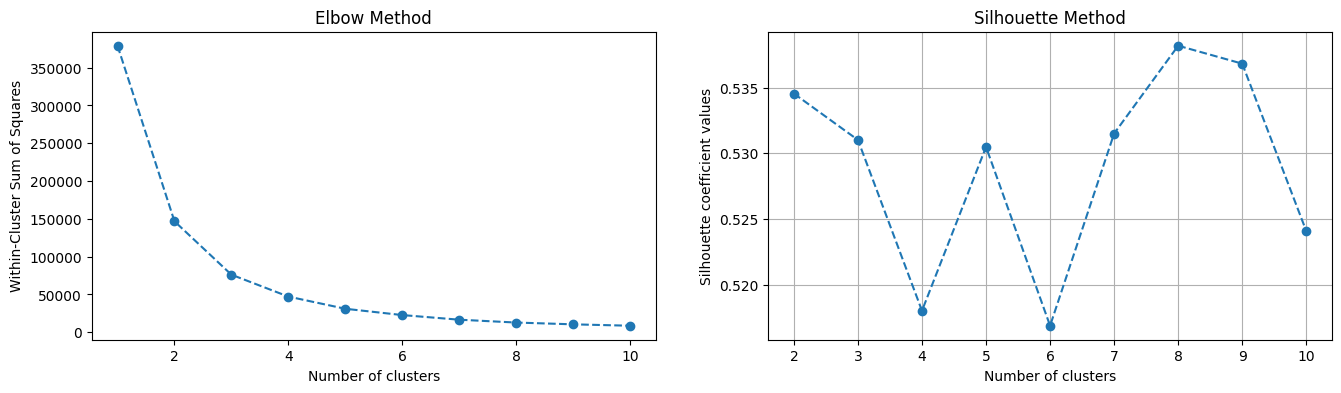

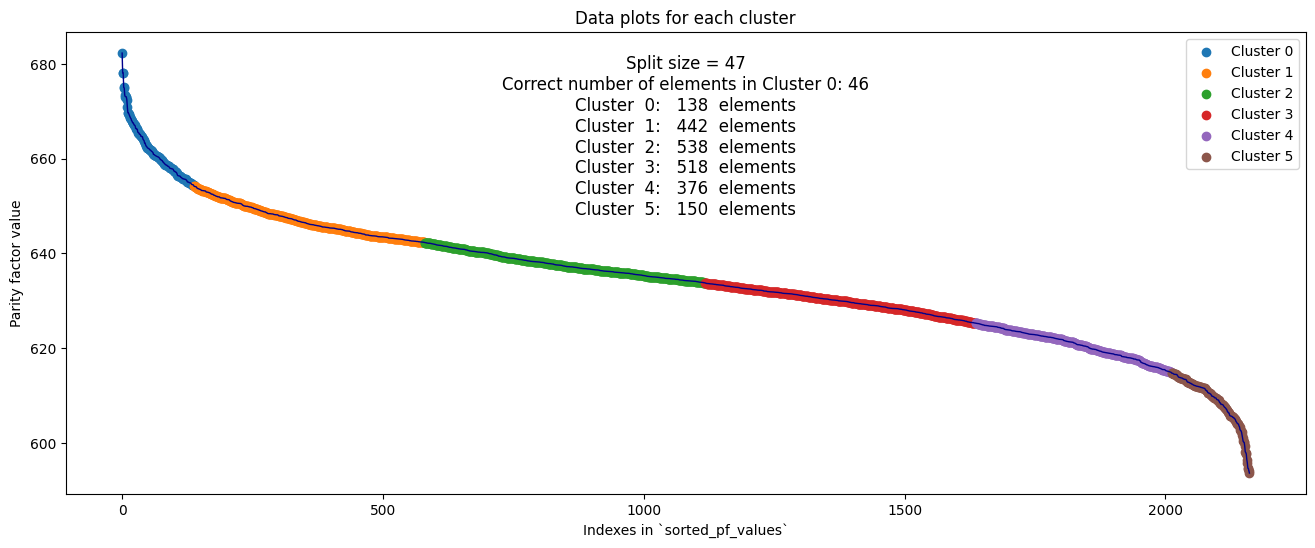

47 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 48 =========================================================================


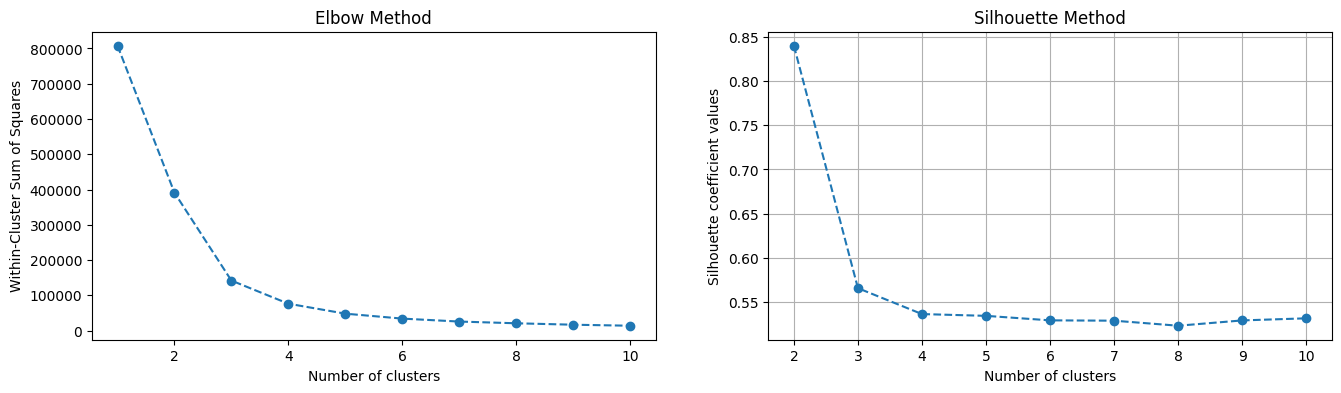

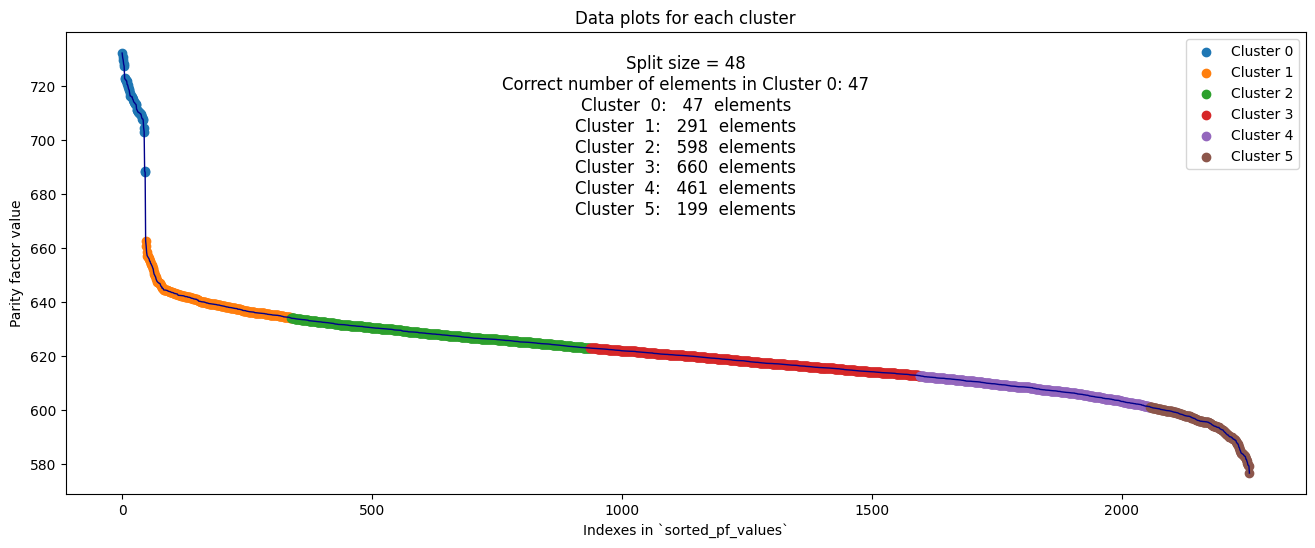

25 (18, 17) [18, 17]
28 (20, 18) [20, 18, 17]
13 (19, 20) [19, 20, 18, 17]
7 (2, 19) [2, 19, 20, 18, 17]
27 (10, 2) [10, 2, 19, 20, 18, 17]
21 (9, 10) [9, 10, 2, 19, 20, 18, 17]
11 (21, 9) [21, 9, 10, 2, 19, 20, 18, 17]
45 (8, 21) [8, 21, 9, 10, 2, 19, 20, 18, 17]
20 (12, 8) [12, 8, 21, 9, 10, 2, 19, 20, 18, 17]
1 (7, 12) [7, 12, 8, 21, 9, 10, 2, 19, 20, 18, 17]
0 (5, 7) [5, 7, 12, 8, 21, 9, 10, 2, 19, 20, 18, 17]
31 (16, 5) [16, 5, 7, 12, 8, 21, 9, 10, 2, 19, 20, 18, 17]
26 (22, 16) [22, 16, 5, 7, 12, 8, 21, 9, 10, 2, 19, 20, 18, 17]
42 (24, 22) [24, 22, 16, 5, 7, 12, 8, 21, 9, 10, 2, 19, 20, 18, 17]
44 (11, 24) [11, 24, 22, 16, 5, 7, 12, 8, 21, 9, 10, 2, 19, 20, 18, 17]
4 (1, 11) [1, 11, 24, 22, 16, 5, 7, 12, 8, 21, 9, 10, 2, 19, 20, 18, 17]
15 (15, 1) [15, 1, 11, 24, 22, 16, 5, 7, 12, 8, 21, 9, 10, 2, 19, 20, 18, 17]
12 (6, 15) [6, 15, 1, 11, 24, 22, 16, 5, 7, 12, 8, 21, 9, 10, 2, 19, 20, 18, 17]
2 (3, 6) [3, 6, 15, 1, 11, 24, 22, 16, 5, 7, 12, 8, 21, 9, 10, 2, 19, 20, 18, 17]
9 (13

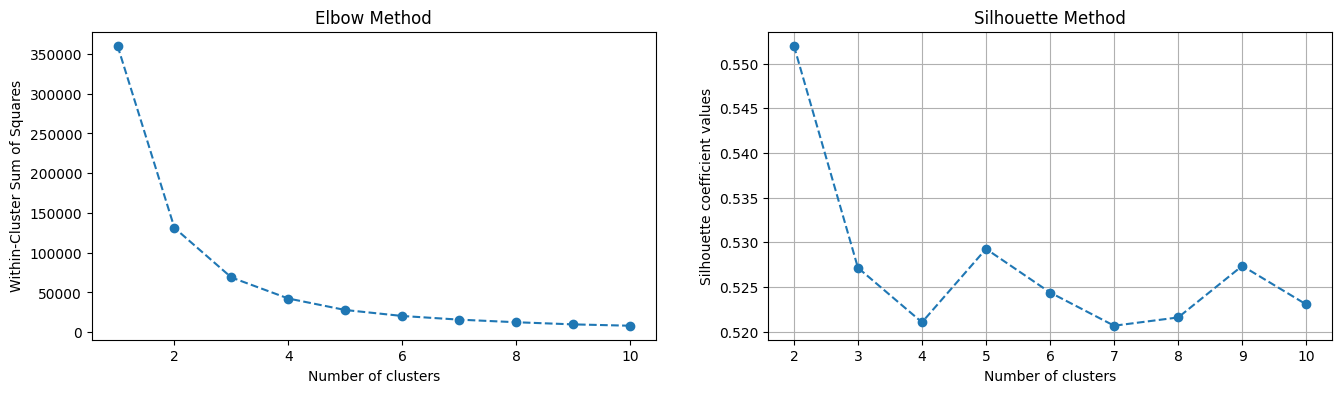

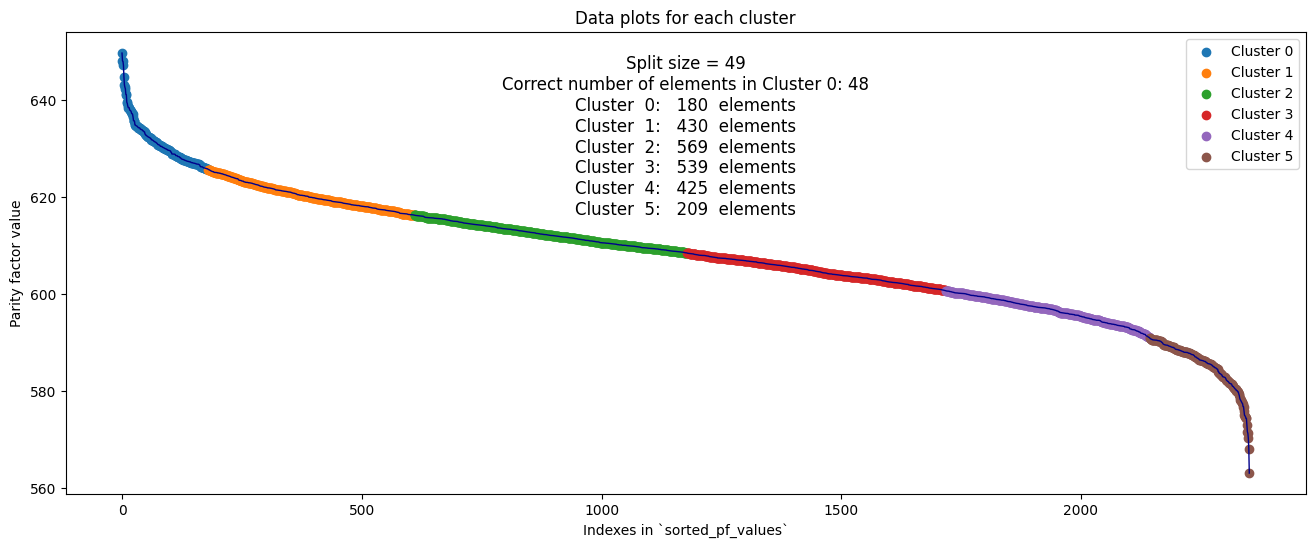

49 - it`s uncorrect split size: several pairs with the same second element



=== New split size - 50 =========================================================================


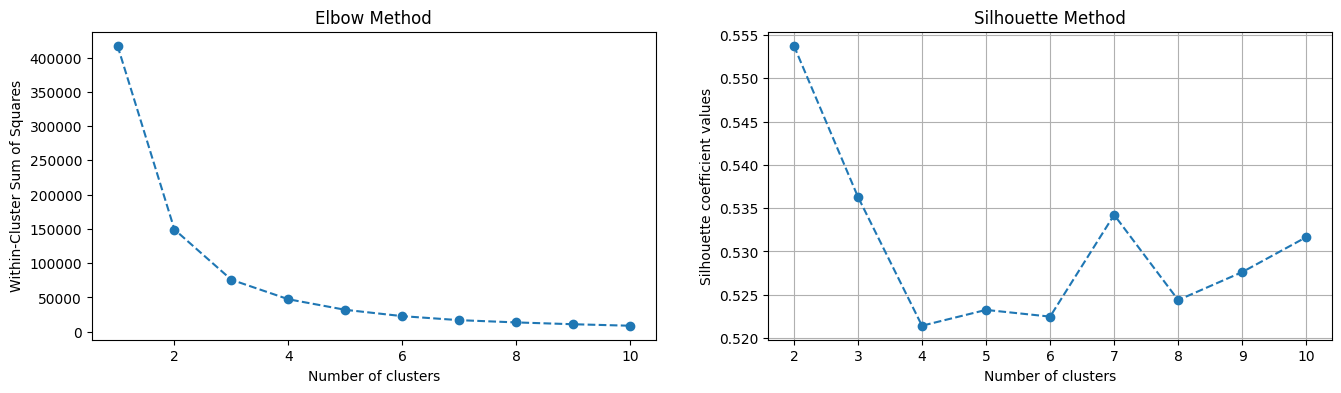

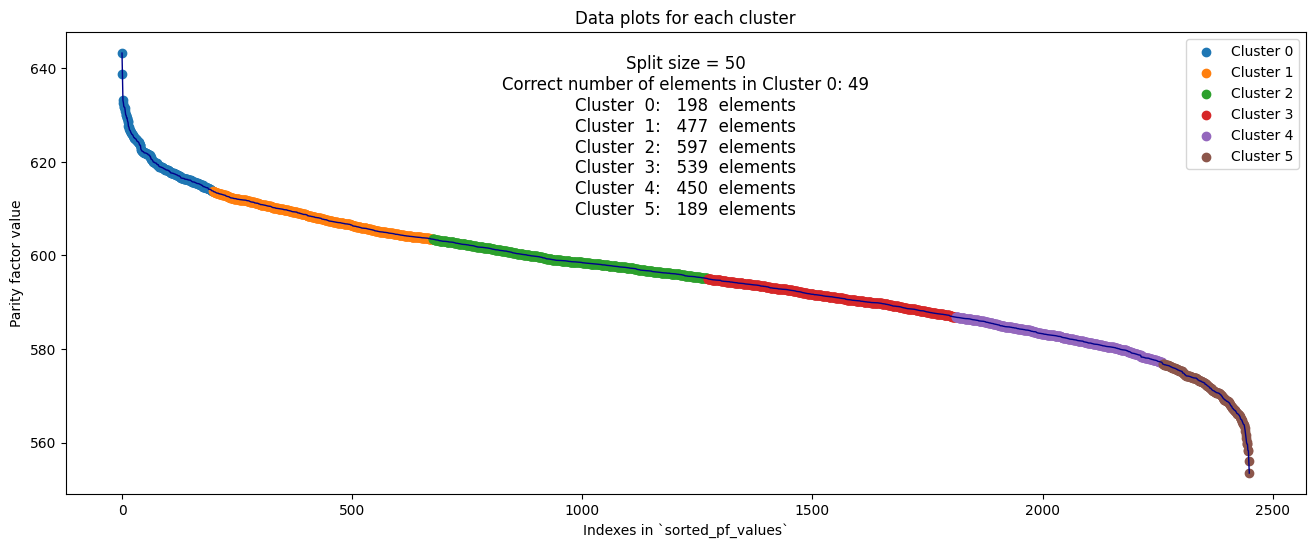

50 - it`s uncorrect split size: several pairs with the same second element


In [ ]:
# r = [10,11,12,14,15,16,17,18,19,20]

for var_split_size in range(5,51):#[10,11,12,13,14,15]
    print('\n'*3 + '='*100)
    print(f'=== New split size - {var_split_size} ===' + '='*70)

    # 1. Preparation of dict with columns
    split_encod = SplitText(encoded_text, var_split_size)
    encod_col_dict = ColDict(split_encod)

    # 2. Parity Factor Table (PFT)
    PFT = ParityFactorTable(encod_col_dict)

    # --------------------------------------------------------------------------
    # Visualization
    # PFT_Heatmap(PFT)
    # PFT_3D(PFT, type3d = 'hist', figsize=(16,12))
    # PFT_3D(PFT, type3d = 'mpl', figsize=(16,12), lower = 0.5, elev=20, azim=70)
    # PFT_3D(PFT, type3d = 'plotly', figsize=(16,12), lower = 0.9)

    # --------------------------------------------------------------------------
    # Data analysis

    # display(pd.DataFrame(PFT.unstack().nlargest(var_split_size-1)))

    sorted_pf_values = PFT.stack().sort_values(ascending=False) # sort values by top largest
    sorted_pf_values = sorted_pf_values.values[:-var_split_size] # remove values that equal to 0

    # Determine the number of clusters
    sva_data = np.array(sorted_pf_values).reshape(-1, 1) # Convertation to correspond format

    plt.figure(figsize=(16, 4))
    plt.subplot(121),   ElbowMethod(sva_data)
    plt.subplot(122),   SilhouetteMethod(sva_data)
    plt.show()

    # K-means Clasterisation
    num_clusters = 6  # User defined

    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=20) # , random_state=42
    kmeans.fit(sva_data)
    labels = kmeans.labels_ # Get cluster labels

    new_labels = GetNewLabels(labels)
    # print('Cluster labels:\n',labels, '\nNew cluster labels:\n',new_labels, sep='')
    # var_split_size = split_size
    PlotsForClusters(sorted_pf_values, new_labels, var_split_size)

    # --------------------------------------------------------------------------
    # 3. Correct order
    PFT_top_largest = PFT.unstack().nlargest(var_split_size-1)
    column_pairs_list = PFT_top_largest.index.tolist()
    # display(column_pairs_list)

    if not DetectionUncorrectSplitSize(column_pairs_list): continue

    correct_order = CorrectOrder(column_pairs_list, p = True) # False
    print('Correct order:   ', correct_order)
    # print('Shuffle position:', new_pos)

    # if correct_order == new_pos: print('All right! Order recovered!!!')
    # else: ('Ooops... There`s a fail(')


    # 4. Text recovery
    decod_col_dict = CorrectColDict(encod_col_dict,correct_order)
    decoded_text = Dict_to_Text(decod_col_dict)
    print(f'Recovery text:\n{decoded_text[:300]}')